/tmp/ipykernel_343140/2685960625.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Age Group", y="Average Pitch", hue="Gender", ci=None)


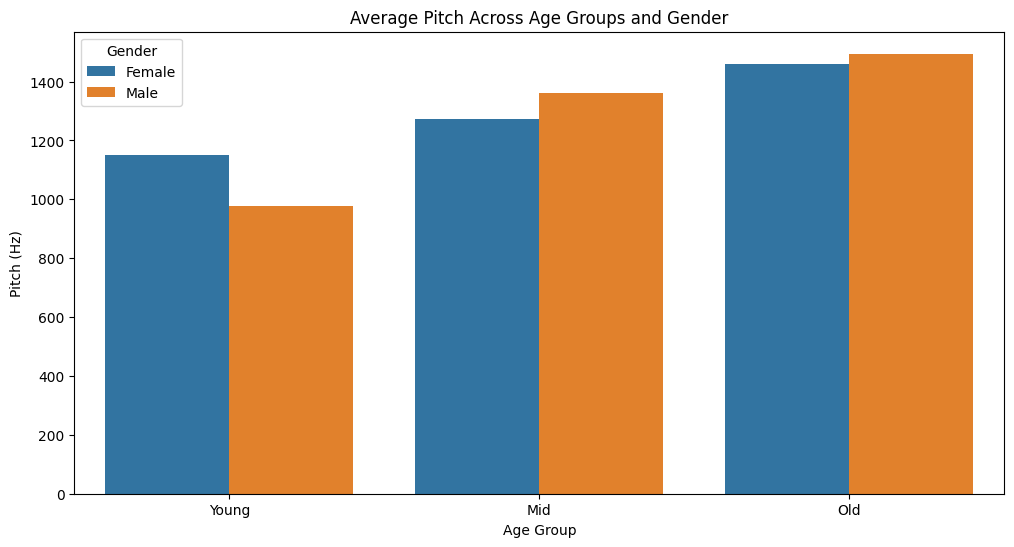

In [7]:
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Directory path
data_dir = "."

# Helper function to extract pitch
def extract_pitch(file_path):
    y, sr = librosa.load(file_path)
    pitches, _ = librosa.piptrack(y=y, sr=sr)
    avg_pitch = pitches[pitches > 0].mean() if pitches[pitches > 0].size else 0
    return avg_pitch

# Parse directory and extract features
# Parse directory and extract features
data = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            avg_pitch = extract_pitch(file_path)

            # Extract language, gender, and age group from directory name
            dir_name = os.path.basename(root)  # Example: 'marathi_female_mid'
            parts = dir_name.split('_')
            if len(parts) == 3:
                language = parts[0]  # Example: 'marathi'
                gender = parts[1]    # Example: 'female'
                age_group = parts[2] # Example: 'mid'
            else:
                print(f"Skipping {root}: Unexpected directory name format")
                continue

            data.append({
                "Language": language.capitalize(),
                "Gender": gender.capitalize(),
                "Age Group": age_group.capitalize(),
                "Average Pitch": avg_pitch
            })


# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Age Group", y="Average Pitch", hue="Gender", ci=None)
plt.title("Average Pitch Across Age Groups and Gender")
plt.ylabel("Pitch (Hz)")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.show()


In [3]:
!pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 5.8 MB/s eta 0:00:006.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:00:01


In [8]:
def extract_duration(file_path):
    y, sr = librosa.load(file_path)
    duration = librosa.get_duration(y=y, sr=sr)
    return duration

# Add durations to DataFrame
data = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            avg_pitch = extract_pitch(file_path)

            # Extract language, gender, and age group from directory name
            dir_name = os.path.basename(root)  # Example: 'marathi_female_mid'
            parts = dir_name.split('_')
            if len(parts) == 3:
                language = parts[0]  # Example: 'marathi'
                gender = parts[1]    # Example: 'female'
                age_group = parts[2] # Example: 'mid'
            else:
                print(f"Skipping {root}: Unexpected directory name format")
                continue

            data.append({
                "Language": language.capitalize(),
                "Gender": gender.capitalize(),
                "Age Group": age_group.capitalize(),
                "Average Pitch": avg_pitch
            })


df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Age Group", y="Duration", hue="Language")
plt.title("Speech Duration by Age Group and Language")
plt.ylabel("Duration (Seconds)")
plt.xlabel("Age Group")
plt.legend(title="Language")
plt.show()

ValueError: Could not interpret value `Duration` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [9]:
import os
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract acoustic features
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Extract features
        pitch = librosa.yin(y, librosa.note_to_hz('C2'), librosa.note_to_hz('C7')).mean()
        intensity = np.mean(librosa.feature.rms(y=y))
        duration = librosa.get_duration(y=y, sr=sr)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr), axis=1)  # Mean of MFCCs
        
        return pitch, intensity, duration, mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None, None, None

# Directory containing the dataset
data_dir = "."

# Parse directory and extract features
data = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            pitch, intensity, duration, mfcc = extract_features(file_path)
            
            if pitch is not None:
                # Extract metadata from directory structure
                dir_name = os.path.basename(root)  # Example: 'marathi_female_mid'
                parts = dir_name.split('_')
                if len(parts) == 3:
                    language = parts[0]
                    gender = parts[1]
                    age_group = parts[2]
                else:
                    print(f"Skipping {root}: Unexpected directory name format")
                    continue

                # Append data
                data.append({
                    "Language": language.capitalize(),
                    "Gender": gender.capitalize(),
                    "Age Group": age_group.capitalize(),
                    "Pitch": pitch,
                    "Intensity": intensity,
                    "Duration": duration,
                    "MFCC": mfcc.tolist()  # Store as a list for potential deeper analysis
                })

# Convert to DataFrame
df = pd.DataFrame(data)
output_csv = "/path/to/output/speech_features.csv"
df.to_csv(output_csv, index=False)

print(f"Feature data saved to {output_csv}")


Error processing ./marathi_female_young/mar_f_yng_3.wav: yin() takes 1 positional argument but 3 were given
Error processing ./marathi_female_young/mar_f_yng_1.wav: yin() takes 1 positional argument but 3 were given
Error processing ./marathi_female_young/mar_f_yng_4.wav: yin() takes 1 positional argument but 3 were given
Error processing ./marathi_female_young/mar_f_yng_5.wav: yin() takes 1 positional argument but 3 were given
Error processing ./marathi_female_young/mar_f_yng_2.wav: yin() takes 1 positional argument but 3 were given
Error processing ./telugu_female_young/tel_f_yng_4.wav: yin() takes 1 positional argument but 3 were given
Error processing ./telugu_female_young/tel_f_yng_3.wav: yin() takes 1 positional argument but 3 were given
Error processing ./telugu_female_young/tel_f_yng_1.wav: yin() takes 1 positional argument but 3 were given
Error processing ./telugu_female_young/tel_f_yng_2.wav: yin() takes 1 positional argument but 3 were given
Error processing ./telugu_female

OSError: Cannot save file into a non-existent directory: '/path/to/output'

In [13]:
import os
import numpy as np
import librosa
import torch
from transformers import Wav2Vec2Model, Wav2Vec2FeatureExtractor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

class SpeakerEmbeddingExtractor:
    def __init__(self, model_name='facebook/wav2vec2-base'):
        """
        Initialize speaker embedding extractor with pre-trained Wav2Vec2 model
        
        Args:
            model_name (str): Hugging Face model for feature extraction
        """
        self.feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
        self.model = Wav2Vec2Model.from_pretrained(model_name)
        
    def extract_embeddings(self, wav_path, max_duration=5):
        """
        Extract speaker embeddings from wav file
        
        Args:
            wav_path (str): Path to wav file
            max_duration (int): Maximum duration to process in seconds
        
        Returns:
            numpy.ndarray: Speaker embedding vector
        """
        # Load audio with librosa
        audio, sr = librosa.load(wav_path, duration=max_duration)
        
        # Preprocess audio
        inputs = self.feature_extractor(
            audio, 
            sampling_rate=16000, 
            return_tensors="pt"
        )
        
        # Extract features
        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        
        return embeddings
    
    def process_dataset(self, base_dir):
        """
        Process entire dataset and extract embeddings
        
        Args:
            base_dir (str): Base directory containing speaker subdirectories
        
        Returns:
            dict: Embeddings organized by language, gender, age
        """
        embeddings_dict = {}
        
        for lang in os.listdir(base_dir):
            lang_path = os.path.join(base_dir, lang)
            if os.path.isdir(lang_path):
                embeddings_dict[lang] = {}
                
                for wav_file in os.listdir(lang_path):
                    wav_path = os.path.join(lang_path, wav_file)
                    embedding = self.extract_embeddings(wav_path)
                    
                    # Categorize embedding based on filename structure
                    lang, gender, age = wav_file.split('_')
                    age = age.split('.')[0]  # Remove file extension
                    
                    if gender not in embeddings_dict[lang]:
                        embeddings_dict[lang][gender] = {}
                    
                    if age not in embeddings_dict[lang][gender]:
                        embeddings_dict[lang][gender][age] = []
                    
                    embeddings_dict[lang][gender][age].append(embedding)
        
        return embeddings_dict

def visualize_embeddings(embeddings_dict):
    """
    Create visualization of speaker embeddings using dimensionality reduction
    
    Args:
        embeddings_dict (dict): Dictionary of speaker embeddings
    """
    all_embeddings = []
    labels = []
    
    # Flatten embeddings
    for lang, gender_dict in embeddings_dict.items():
        for gender, age_dict in gender_dict.items():
            for age, embeds in age_dict.items():
                all_embeddings.extend(embeds)
                labels.extend([f"{lang}_{gender}_{age}"]*len(embeds))
    
    # Apply dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    pca = PCA(n_components=2)
    
    # TSNE Visualization
    tsne_results = tsne.fit_transform(all_embeddings)
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        tsne_results[:, 0], 
        tsne_results[:, 1], 
        c=[hash(label) for label in labels], 
        cmap='viridis'
    )
    plt.title('t-SNE Visualization of Speaker Embeddings')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(scatter, label='Speaker Category')
    plt.tight_layout()
    plt.show()

# Example usage
extractor = SpeakerEmbeddingExtractor()
embeddings = extractor.process_dataset('.')
visualize_embeddings(embeddings)

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: too many values to unpack (expected 3)

In [14]:
import os
import numpy as np
import librosa
import torch
from transformers import Wav2Vec2Model, Wav2Vec2FeatureExtractor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

class SpeakerEmbeddingExtractor:
    def __init__(self, model_name='facebook/wav2vec2-base'):
        """
        Initialize speaker embedding extractor with pre-trained Wav2Vec2 model
        
        Args:
            model_name (str): Hugging Face model for feature extraction
        """
        self.feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
        self.model = Wav2Vec2Model.from_pretrained(model_name)
        
    def extract_embeddings(self, wav_path, max_duration=5):
        """
        Extract speaker embeddings from wav file
        
        Args:
            wav_path (str): Path to wav file
            max_duration (int): Maximum duration to process in seconds
        
        Returns:
            numpy.ndarray: Speaker embedding vector
        """
        # Load audio with librosa
        audio, sr = librosa.load(wav_path, duration=max_duration)
        
        # Preprocess audio
        inputs = self.feature_extractor(
            audio, 
            sampling_rate=sr, 
            return_tensors="pt"
        )
        
        # Extract features
        with torch.no_grad():
            outputs = self.model(**inputs)
            embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
        
        return embeddings
    
    def process_dataset(self, base_dir):
        """
        Process entire dataset and extract embeddings
        
        Args:
            base_dir (str): Base directory containing speaker subdirectories
        
        Returns:
            dict: Embeddings organized by language, gender, age
        """
        embeddings_dict = {}
        
        for subdir in os.listdir(base_dir):
            subdir_path = os.path.join(base_dir, subdir)
            
            # Skip if not a directory
            if not os.path.isdir(subdir_path):
                continue
            
            # Parse language, gender, age from directory name
            try:
                parts = subdir.split()
                lang = parts[0].lower()[:3]  # First 3 letters of language
                gender = parts[1].lower()[0]  # First letter of gender
                age = parts[2].lower()[:3]   # First 3 letters of age group
            except Exception as e:
                print(f"Skipping directory {subdir} due to parsing error: {e}")
                continue
            
            # Initialize nested dictionary if not exists
            if lang not in embeddings_dict:
                embeddings_dict[lang] = {}
            if gender not in embeddings_dict[lang]:
                embeddings_dict[lang][gender] = {}
            if age not in embeddings_dict[lang][gender]:
                embeddings_dict[lang][gender][age] = []
            
            # Process wav files
            for wav_file in os.listdir(subdir_path):
                # Skip non-wav files
                if not wav_file.lower().endswith(('.wav', '.mp4')):
                    continue
                
                wav_path = os.path.join(subdir_path, wav_file)
                try:
                    embedding = self.extract_embeddings(wav_path)
                    embeddings_dict[lang][gender][age].append(embedding)
                except Exception as e:
                    print(f"Error processing {wav_path}: {e}")
        
        return embeddings_dict

def visualize_embeddings(embeddings_dict):
    """
    Create visualization of speaker embeddings using dimensionality reduction
    
    Args:
        embeddings_dict (dict): Dictionary of speaker embeddings
    """
    all_embeddings = []
    labels = []
    
    # Flatten embeddings
    for lang, gender_dict in embeddings_dict.items():
        for gender, age_dict in gender_dict.items():
            for age, embeds in age_dict.items():
                all_embeddings.extend(embeds)
                labels.extend([f"{lang}_{gender}_{age}"]*len(embeds))
    
    # Ensure we have embeddings
    if not all_embeddings:
        print("No embeddings found to visualize!")
        return
    
    # Apply dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    
    # Ensure we have at least 2 samples
    if len(all_embeddings) < 2:
        print("Not enough embeddings for visualization!")
        return
    
    # Convert to numpy array
    all_embeddings = np.array(all_embeddings)
    
    # TSNE Visualization
    tsne_results = tsne.fit_transform(all_embeddings)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        tsne_results[:, 0], 
        tsne_results[:, 1], 
        c=[hash(label) for label in labels], 
        cmap='viridis'
    )
    plt.title('t-SNE Visualization of Speaker Embeddings')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    
    # Create a legend
    unique_labels = list(set(labels))
    handles = [plt.scatter([], [], color=plt.cm.viridis(hash(label)/(max(hash(l) for l in unique_labels))), label=label) 
               for label in unique_labels]
    plt.legend(handles=handles, title='Speaker Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Example usage
extractor = SpeakerEmbeddingExtractor()
embeddings = extractor.process_dataset('.')
visualize_embeddings(embeddings)

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Skipping directory marathi_female_young due to parsing error: list index out of range
Skipping directory telugu_female_young due to parsing error: list index out of range
Skipping directory telugu_male_mid due to parsing error: list index out of range
Skipping directory marathi_male_old due to parsing error: list index out of range
Skipping directory marathi_female_mid due to parsing error: list index out of range
Skipping directory marathi_female_old due to parsing error: list index out of range
Skipping directory marathi_male_young due to parsing error: list index out of range
Skipping directory marathi_male_mid due to parsing error: list index out of range
Skipping directory telugu_female_mid due to parsing error: list index out of range
No embeddings found to visualize!


Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/m

Embedding Extraction Summary:

Language: mar
  Gender: f
    Age Group you: 5 embeddings
    Age Group mid: 20 embeddings
    Age Group old: 5 embeddings
  Gender: m
    Age Group old: 5 embeddings
    Age Group you: 5 embeddings
    Age Group mid: 15 embeddings

Language: tel
  Gender: f
    Age Group you: 5 embeddings
    Age Group mid: 5 embeddings
  Gender: m
    Age Group mid: 5 embeddings


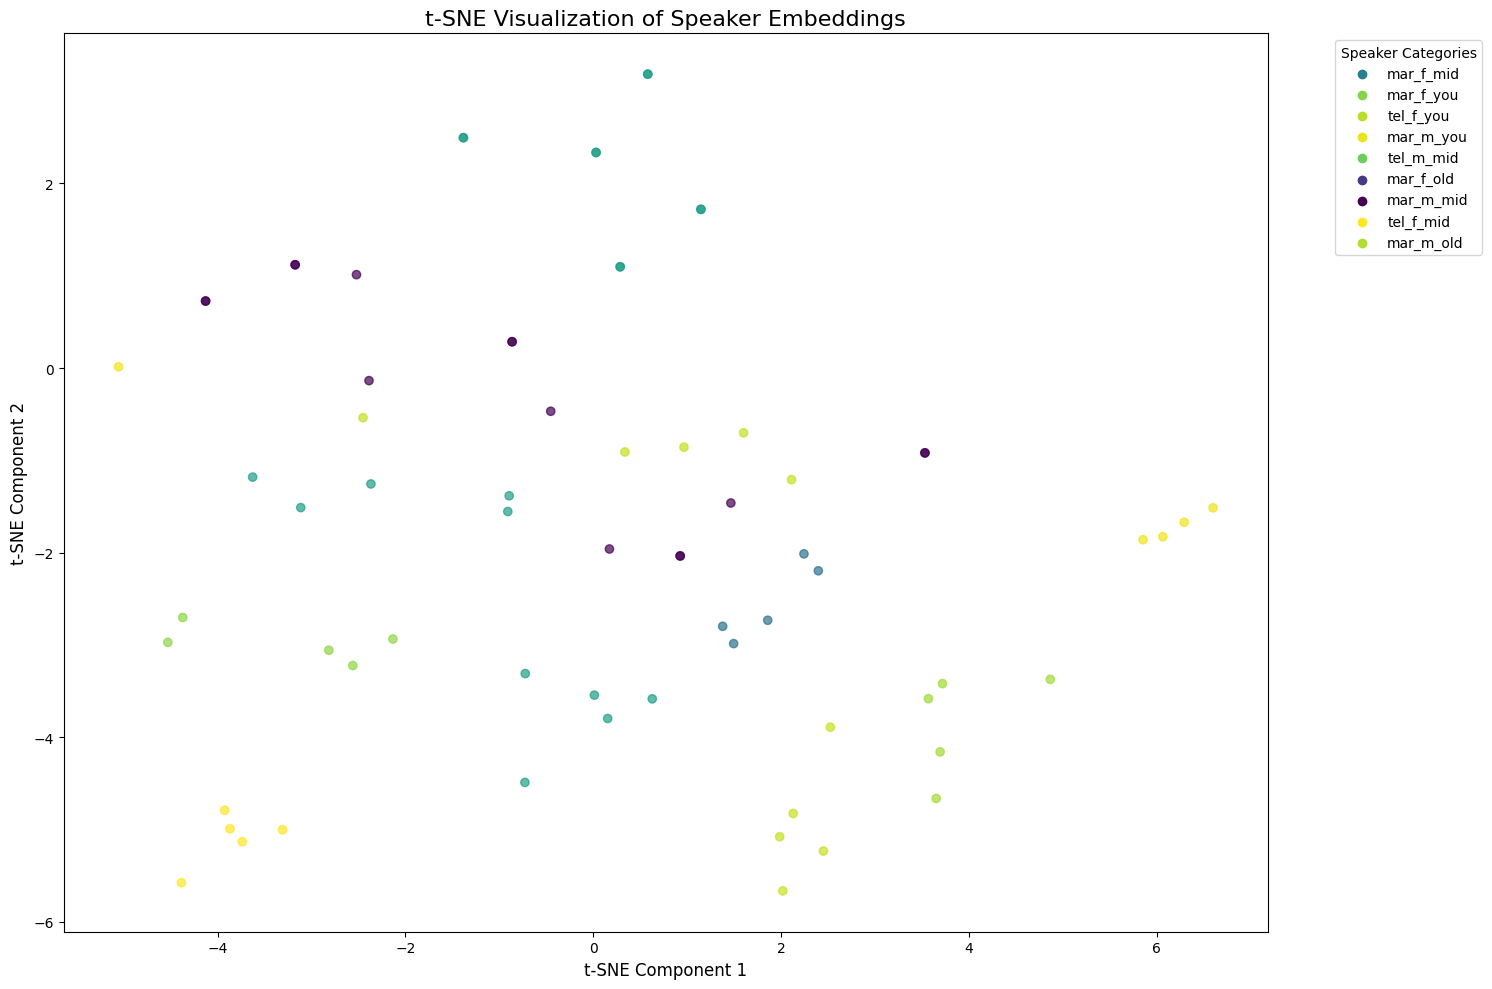

In [16]:
import os
import numpy as np
import librosa
import torch
from transformers import Wav2Vec2Model, Wav2Vec2FeatureExtractor
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

class SpeakerEmbeddingExtractor:
    def __init__(self, model_name='facebook/wav2vec2-base'):
        """
        Initialize speaker embedding extractor with pre-trained Wav2Vec2 model
        
        Initialization includes:
        1. Loading feature extractor
        2. Loading pre-trained Wav2Vec2 model
        3. Preparing for potential transfer learning
        """
        # Suppress specific warning about uninitialized weights
        import warnings
        warnings.filterwarnings("ignore", category=UserWarning)
        
        self.feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)
        self.model = Wav2Vec2Model.from_pretrained(model_name)
        
    def extract_embeddings(self, wav_path, max_duration=5):
        """
        Extract speaker embeddings from wav file
        
        Args:
            wav_path (str): Path to wav file
            max_duration (int): Maximum duration to process in seconds
        
        Returns:
            numpy.ndarray: Speaker embedding vector
        """
        try:
            # Load audio with librosa
            audio, sr = librosa.load(wav_path, duration=max_duration)
            
            # Preprocess audio
            inputs = self.feature_extractor(
                audio, 
                sampling_rate=16000, 
                return_tensors="pt"
            )
            
            # Extract features
            with torch.no_grad():
                outputs = self.model(**inputs)
                embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            
            return embeddings
        
        except Exception as e:
            print(f"Error extracting embeddings from {wav_path}: {e}")
            return None
    
    def process_dataset(self, base_dir):
        """
        Process entire dataset and extract embeddings
        
        Args:
            base_dir (str): Base directory containing speaker subdirectories
        
        Returns:
            dict: Embeddings organized by language, gender, age
        """
        embeddings_dict = {}
        
        for subdir in os.listdir(base_dir):
            subdir_path = os.path.join(base_dir, subdir)
            
            # Skip if not a directory
            if not os.path.isdir(subdir_path):
                continue
            
            # Parse language, gender, age from directory name with underscores
            try:
                parts = subdir.split('_')
                if len(parts) < 3:
                    print(f"Skipping directory {subdir}: insufficient information")
                    continue
                
                lang = parts[0].lower()[:3]  # First 3 letters of language
                gender = parts[1].lower()[0]  # First letter of gender
                age = parts[2].lower()[:3]   # First 3 letters of age group
            except Exception as e:
                print(f"Skipping directory {subdir} due to parsing error: {e}")
                continue
            
            # Initialize nested dictionary if not exists
            if lang not in embeddings_dict:
                embeddings_dict[lang] = {}
            if gender not in embeddings_dict[lang]:
                embeddings_dict[lang][gender] = {}
            if age not in embeddings_dict[lang][gender]:
                embeddings_dict[lang][gender][age] = []
            
            # Process wav files
            for wav_file in os.listdir(subdir_path):
                # Skip non-wav files
                if not wav_file.lower().endswith(('.wav', '.mp4')):
                    continue
                
                wav_path = os.path.join(subdir_path, wav_file)
                try:
                    embedding = self.extract_embeddings(wav_path)
                    if embedding is not None:
                        embeddings_dict[lang][gender][age].append(embedding)
                except Exception as e:
                    print(f"Error processing {wav_path}: {e}")
        
        return embeddings_dict

def visualize_embeddings(embeddings_dict):
    """
    Create visualization of speaker embeddings using t-SNE
    
    Args:
        embeddings_dict (dict): Dictionary of speaker embeddings
    """
    all_embeddings = []
    labels = []
    
    # Flatten embeddings
    for lang, gender_dict in embeddings_dict.items():
        for gender, age_dict in gender_dict.items():
            for age, embeds in age_dict.items():
                all_embeddings.extend(embeds)
                labels.extend([f"{lang}_{gender}_{age}"]*len(embeds))
    
    # Ensure we have embeddings
    if not all_embeddings:
        print("No embeddings found to visualize!")
        return
    
    # Ensure we have at least 2 samples
    if len(all_embeddings) < 2:
        print("Not enough embeddings for visualization!")
        return
    
    # Convert to numpy array
    all_embeddings = np.array(all_embeddings)
    
    # Apply dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(all_embeddings)
    
    # Visualization
    plt.figure(figsize=(15, 10))
    scatter = plt.scatter(
        tsne_results[:, 0], 
        tsne_results[:, 1], 
        c=[hash(label) for label in labels], 
        cmap='viridis',
        alpha=0.7
    )
    plt.title('t-SNE Visualization of Speaker Embeddings', fontsize=16)
    plt.xlabel('t-SNE Component 1', fontsize=12)
    plt.ylabel('t-SNE Component 2', fontsize=12)
    
    # Create a legend
    unique_labels = list(set(labels))
    handles = [plt.scatter([], [], color=plt.cm.viridis(hash(label)/(max(hash(l) for l in unique_labels))), 
                           label=label) for label in unique_labels]
    plt.legend(handles=handles, title='Speaker Categories', 
               bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()

def print_embedding_summary(embeddings_dict):
    """
    Print summary of extracted embeddings
    """
    print("Embedding Extraction Summary:")
    for lang, gender_dict in embeddings_dict.items():
        print(f"\nLanguage: {lang}")
        for gender, age_dict in gender_dict.items():
            print(f"  Gender: {gender}")
            for age, embeds in age_dict.items():
                print(f"    Age Group {age}: {len(embeds)} embeddings")

# Main execution
extractor = SpeakerEmbeddingExtractor()
embeddings = extractor.process_dataset('.')

# Print summary
print_embedding_summary(embeddings)

# Visualize
visualize_embeddings(embeddings)

/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__au

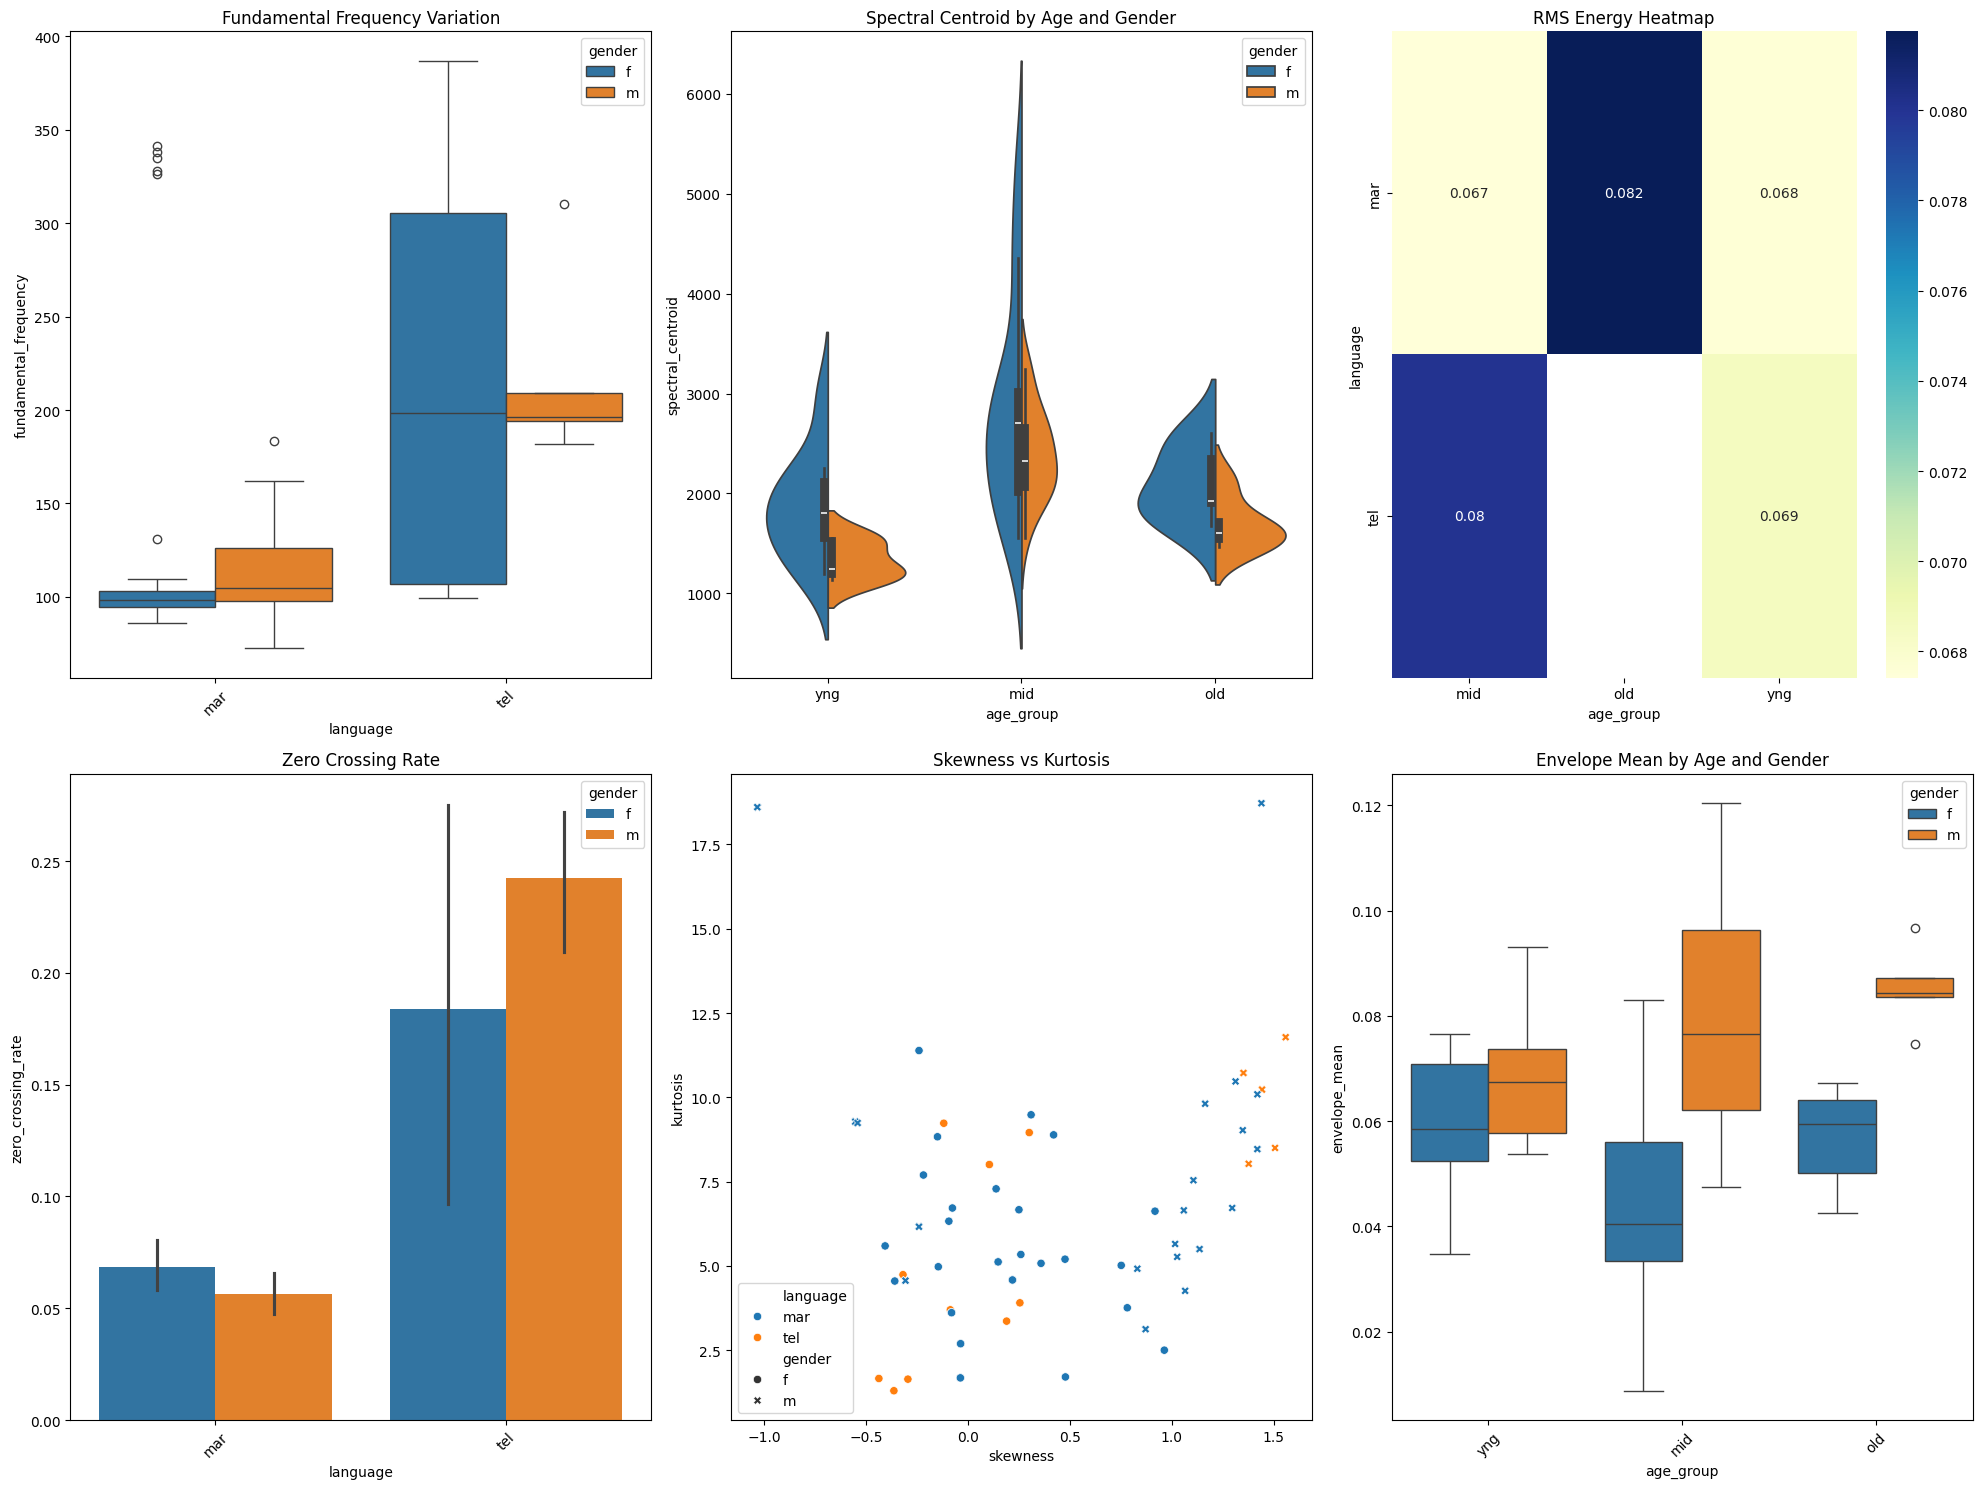

Statistical Analysis Results:

Fundamental Frequency Variations:
  Language Variation: p-value = 0.00018256185552281712
  Gender Variation: p-value = 0.2151002032940346
  Age Group Variation: p-value = 0.002953788937660884

Spectral Centroid Variations:
  Language Variation: p-value = 0.33330312346050284
  Gender Variation: p-value = 0.04843030951761962
  Age Group Variation: p-value = 5.7029303046027094e-05

Rms Energy Variations:
  Language Variation: p-value = 0.5100774
  Gender Variation: p-value = 1.6790816e-10
  Age Group Variation: p-value = 0.5281896

Zero Crossing Rate Variations:
  Language Variation: p-value = 7.706264978062368e-11
  Gender Variation: p-value = 0.6233232063725538
  Age Group Variation: p-value = 0.06610443334258051


In [17]:
import os
import numpy as np
import pandas as pd
import librosa
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import hilbert
from scipy.stats import skew, kurtosis

class SpeechAnalyzer:
    def __init__(self, base_dir):
        """
        Initialize Speech Analyzer with comprehensive feature extraction capabilities
        
        Args:
            base_dir (str): Base directory containing speech recordings
        """
        self.base_dir = base_dir
        self.speech_features = []
    
    def extract_comprehensive_features(self, wav_path):
        """
        Extract a wide range of linguistic and acoustic features
        
        Returns:
            dict: Comprehensive speech analysis features
        """
        # Load audio file
        audio, sr = librosa.load(wav_path, sr=None)
        
        # Fundamental acoustic features
        features = {
            # Time-domain features
            'duration': librosa.get_duration(y=audio, sr=sr),
            'rms_energy': np.sqrt(np.mean(audio**2)),
            'zero_crossing_rate': librosa.feature.zero_crossing_rate(audio)[0].mean(),
            
            # Spectral features
            'spectral_centroid': librosa.feature.spectral_centroid(y=audio, sr=sr)[0].mean(),
            'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0].mean(),
            'spectral_rolloff': librosa.feature.spectral_rolloff(y=audio, sr=sr)[0].mean(),
            
            # Harmonic features
            'fundamental_frequency': self._estimate_fundamental_frequency(audio, sr),
            
            # Statistical moments
            'skewness': skew(audio),
            'kurtosis': kurtosis(audio),
            
            # Envelope features
            'envelope_mean': np.mean(np.abs(hilbert(audio))),
            'envelope_std': np.std(np.abs(hilbert(audio)))
        }
        
        # Categorize the file
        filename = os.path.basename(wav_path)
        parts = filename.split('_')
        
        # Extract metadata
        features.update({
            'language': parts[0] if len(parts) > 0 else 'unknown',
            'gender': parts[1] if len(parts) > 1 else 'unknown',
            'age_group': parts[2] if len(parts) > 2 else 'unknown'
        })
        
        return features
    
    def _estimate_fundamental_frequency(self, audio, sr):
        """
        Advanced fundamental frequency estimation
        
        Args:
            audio (np.array): Audio time series
            sr (int): Sampling rate
        
        Returns:
            float: Estimated fundamental frequency
        """
        # Use YIN algorithm for f0 estimation
        f0 = librosa.yin(audio, fmin=librosa.note_to_hz('C2'), 
                          fmax=librosa.note_to_hz('C7'))
        
        # Return median of non-zero frequencies
        non_zero_f0 = f0[f0 > 0]
        return np.median(non_zero_f0) if len(non_zero_f0) > 0 else 0
    
    def process_dataset(self):
        """
        Process entire dataset and extract features
        
        Returns:
            pd.DataFrame: Comprehensive speech features
        """
        features_list = []
        
        # Traverse through all subdirectories
        for subdir in os.listdir(self.base_dir):
            subdir_path = os.path.join(self.base_dir, subdir)
            
            # Skip if not a directory
            if not os.path.isdir(subdir_path):
                continue
            
            # Process each audio file
            for wav_file in os.listdir(subdir_path):
                if wav_file.lower().endswith(('.wav', '.mp4')):
                    wav_path = os.path.join(subdir_path, wav_file)
                    try:
                        features = self.extract_comprehensive_features(wav_path)
                        features_list.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        return pd.DataFrame(features_list)
    
    def visualize_features(self, df):
        """
        Create comprehensive visualizations of speech features
        
        Args:
            df (pd.DataFrame): DataFrame with speech features
        """
        # Plotting setup
        plt.figure(figsize=(20, 15))
        
        # 1. Boxplot of Fundamental Frequency by Language, Gender, Age
        plt.subplot(2, 3, 1)
        sns.boxplot(x='language', y='fundamental_frequency', 
                    hue='gender', data=df)
        plt.title('Fundamental Frequency Variation')
        plt.xticks(rotation=45)
        
        # 2. Spectral Centroid Distribution
        plt.subplot(2, 3, 2)
        sns.violinplot(x='age_group', y='spectral_centroid', 
                       hue='gender', data=df, split=True)
        plt.title('Spectral Centroid by Age and Gender')
        
        # 3. RMS Energy Heatmap
        plt.subplot(2, 3, 3)
        energy_pivot = df.pivot_table(
            values='rms_energy', 
            index='language', 
            columns='age_group', 
            aggfunc='mean'
        )
        sns.heatmap(energy_pivot, annot=True, cmap='YlGnBu')
        plt.title('RMS Energy Heatmap')
        
        # 4. Zero Crossing Rate Comparison
        plt.subplot(2, 3, 4)
        sns.barplot(x='language', y='zero_crossing_rate', 
                    hue='gender', data=df)
        plt.title('Zero Crossing Rate')
        plt.xticks(rotation=45)
        
        # 5. Statistical Moments Scatter
        plt.subplot(2, 3, 5)
        sns.scatterplot(x='skewness', y='kurtosis', 
                        hue='language', style='gender', data=df)
        plt.title('Skewness vs Kurtosis')
        
        # 6. Envelope Features
        plt.subplot(2, 3, 6)
        sns.boxplot(x='age_group', y='envelope_mean', 
                    hue='gender', data=df)
        plt.title('Envelope Mean by Age and Gender')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def statistical_analysis(self, df):
        """
        Perform statistical tests to compare speech characteristics
        
        Args:
            df (pd.DataFrame): DataFrame with speech features
        """
        # ANOVA-like comparisons
        statistical_results = {}
        
        # Features to analyze
        features_to_test = [
            'fundamental_frequency', 
            'spectral_centroid', 
            'rms_energy', 
            'zero_crossing_rate'
        ]
        
        for feature in features_to_test:
            # Group-wise statistical comparison
            language_groups = [group[feature].values 
                               for name, group in df.groupby('language')]
            gender_groups = [group[feature].values 
                             for name, group in df.groupby('gender')]
            age_groups = [group[feature].values 
                          for name, group in df.groupby('age_group')]
            
            # Perform ANOVA-like tests
            statistical_results[feature] = {
                'language_f_test': stats.f_oneway(*language_groups),
                'gender_f_test': stats.f_oneway(*gender_groups),
                'age_f_test': stats.f_oneway(*age_groups)
            }
        
        # Print statistical analysis results
        print("Statistical Analysis Results:")
        for feature, tests in statistical_results.items():
            print(f"\n{feature.replace('_', ' ').title()} Variations:")
            print("  Language Variation: p-value =", tests['language_f_test'].pvalue)
            print("  Gender Variation: p-value =", tests['gender_f_test'].pvalue)
            print("  Age Group Variation: p-value =", tests['age_f_test'].pvalue)
        
        return statistical_results

# Main execution
def main():
    # Initialize analyzer
    analyzer = SpeechAnalyzer('.')
    
    # Process dataset
    speech_df = analyzer.process_dataset()
    
    # Visualize features
    analyzer.visualize_features(speech_df)
    
    # Perform statistical analysis
    statistical_results = analyzer.statistical_analysis(speech_df)

if __name__ == "__main__":
    main()

/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__au

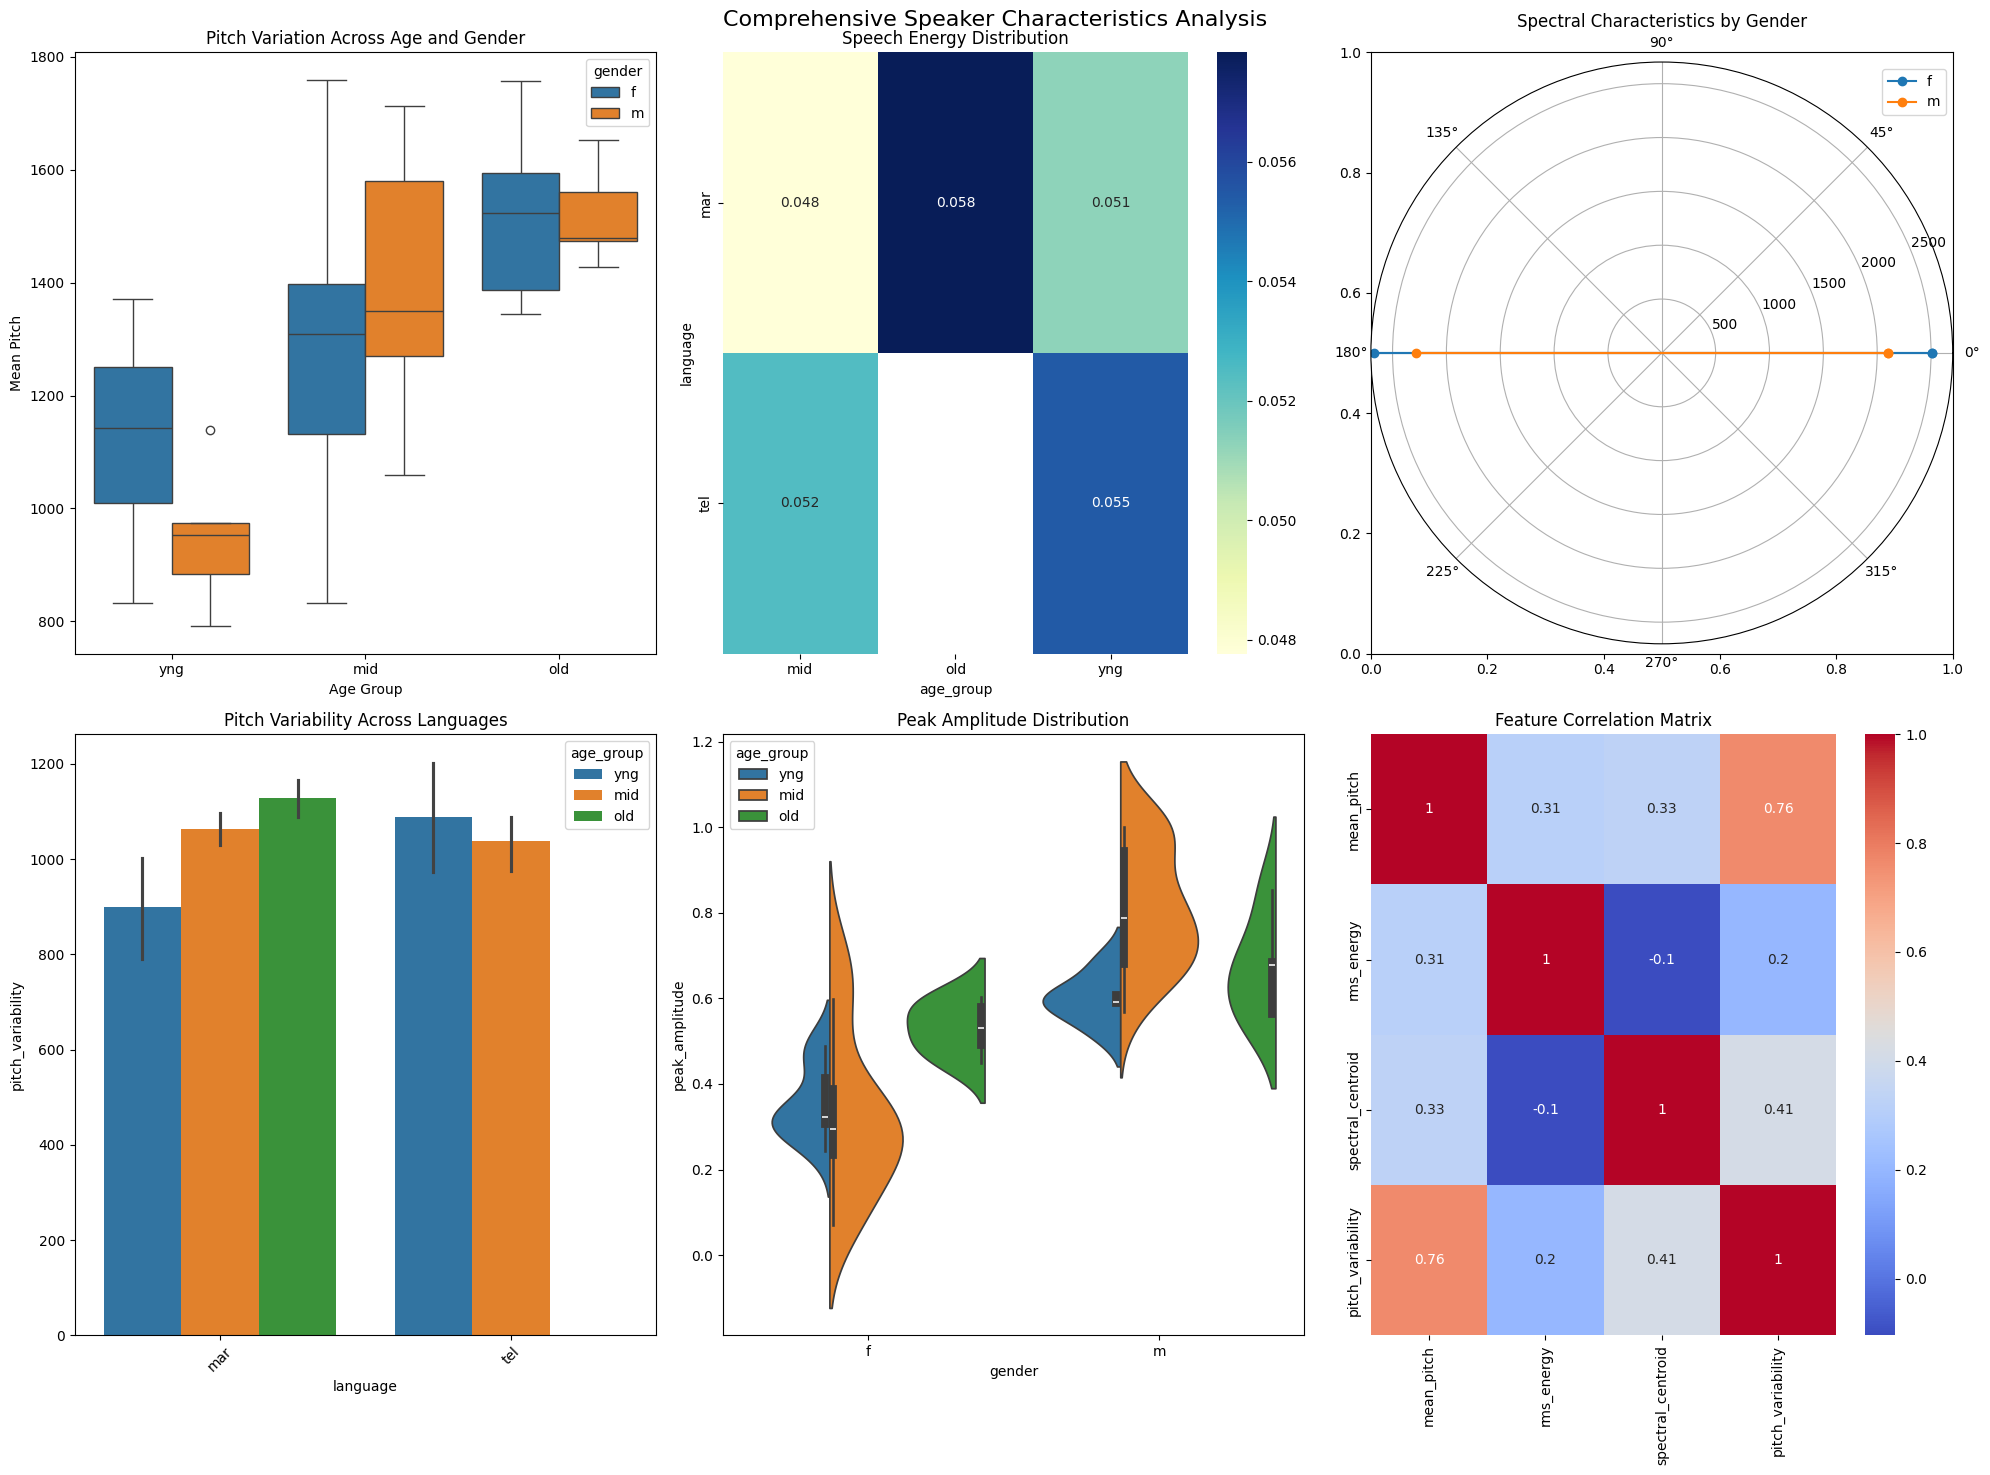


--- Speaker Dataset Insights ---

Demographic Composition:
language  gender  age_group
mar       f       mid          20
                  old           5
                  yng           5
          m       mid          15
                  old           5
                  yng           5
tel       f       mid           5
                  yng           5
          m       mid           5
dtype: int64

Acoustic Feature Statistics:
         mean_pitch             rms_energy           spectral_centroid  \
               mean         std       mean       std              mean   
gender                                                                   
f       1274.165527  234.105667   0.039524  0.016205       2505.065143   
m       1335.696899  253.538986   0.066133  0.017473       2099.530716   

                    
               std  
gender              
f       981.698028  
m       583.672143  


: 

In [18]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

class SpeakerInsightsAnalyzer:
    def __init__(self, base_dir):
        """
        Initialize comprehensive speaker analysis toolkit
        
        Key Focus Areas:
        1. Acoustic Feature Extraction
        2. Linguistic Variation Mapping
        3. Comparative Visualization
        """
        self.base_dir = base_dir
        self.features_df = None
    
    def extract_core_features(self, wav_path):
        """
        Extract key acoustic and linguistic features
        
        Feature Categories:
        - Pitch Characteristics
        - Energy Dynamics
        - Spectral Properties
        """
        # Load audio file
        audio, sr = librosa.load(wav_path, sr=None)
        
        # Pitch and Fundamental Frequency
        pitches, _ = librosa.piptrack(y=audio, sr=sr)
        pitch_features = {
            'mean_pitch': np.mean(pitches[pitches > 0]),
            'pitch_variability': np.std(pitches[pitches > 0]),
        }
        
        # Energy and Amplitude
        energy_features = {
            'rms_energy': librosa.feature.rms(y=audio)[0].mean(),
            'peak_amplitude': np.max(np.abs(audio)),
        }
        
        # Spectral Features
        spectral_features = {
            'spectral_centroid': librosa.feature.spectral_centroid(y=audio, sr=sr)[0].mean(),
            'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0].mean(),
        }
        
        # Extract metadata from filename
        filename = os.path.basename(wav_path)
        parts = filename.split('_')
        
        # Combine all features
        features = {
            **pitch_features,
            **energy_features,
            **spectral_features,
            'language': parts[0] if len(parts) > 0 else 'unknown',
            'gender': parts[1] if len(parts) > 1 else 'unknown',
            'age_group': parts[2] if len(parts) > 2 else 'unknown'
        }
        
        return features
    
    def process_dataset(self):
        """
        Comprehensive dataset feature extraction
        
        Processing Strategy:
        1. Traverse all audio files
        2. Extract standardized features
        3. Create unified feature representation
        """
        features_list = []
        
        for subdir in os.listdir(self.base_dir):
            subdir_path = os.path.join(self.base_dir, subdir)
            
            if not os.path.isdir(subdir_path):
                continue
            
            for wav_file in os.listdir(subdir_path):
                if wav_file.lower().endswith(('.wav', '.mp4')):
                    wav_path = os.path.join(subdir_path, wav_file)
                    try:
                        features = self.extract_core_features(wav_path)
                        features_list.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        self.features_df = pd.DataFrame(features_list)
        return self.features_df
    
    def visualize_speaker_insights(self):
        """
        Create Multi-Dimensional Visualization of Speaker Characteristics
        
        Visualization Strategy:
        1. Comparative Analysis
        2. Dimensionality Reduction
        3. Intuitive Visual Representations
        """
        # Set up the visualization grid
        plt.figure(figsize=(20, 15))
        plt.suptitle('Comprehensive Speaker Characteristics Analysis', fontsize=16)
        
        # 1. Pitch Characteristics Across Demographics
        plt.subplot(2, 3, 1)
        sns.boxplot(x='age_group', y='mean_pitch', 
                    hue='gender', data=self.features_df)
        plt.title('Pitch Variation Across Age and Gender')
        plt.xlabel('Age Group')
        plt.ylabel('Mean Pitch')
        
        # 2. Energy Distribution Heatmap
        plt.subplot(2, 3, 2)
        energy_pivot = self.features_df.pivot_table(
            values='rms_energy', 
            index='language', 
            columns='age_group', 
            aggfunc='mean'
        )
        sns.heatmap(energy_pivot, annot=True, cmap='YlGnBu')
        plt.title('Speech Energy Distribution')
        
        # 3. Spectral Characteristics Radar
        plt.subplot(2, 3, 3)
        spectral_pivot = self.features_df.groupby('gender')[
            ['spectral_centroid', 'spectral_bandwidth']
        ].mean()
        
        categories = list(spectral_pivot.columns)
        N = len(categories)
        
        # Create angle for each axis
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        # Plot for each gender
        plt.subplot(2, 3, 3, polar=True)
        for i, gender in enumerate(spectral_pivot.index):
            values = spectral_pivot.loc[gender].tolist()
            values += values[:1]
            plt.polar(angles, values, 
                      marker='o', 
                      linestyle='solid', 
                      label=gender)
        
        plt.title('Spectral Characteristics by Gender')
        plt.legend(loc='best')
        
        # 4. Pitch Variability Across Languages
        plt.subplot(2, 3, 4)
        sns.barplot(x='language', y='pitch_variability', 
                    hue='age_group', data=self.features_df)
        plt.title('Pitch Variability Across Languages')
        plt.xticks(rotation=45)
        
        # 5. Peak Amplitude Distribution
        plt.subplot(2, 3, 5)
        sns.violinplot(x='gender', y='peak_amplitude', 
                       hue='age_group', data=self.features_df, 
                       split=True)
        plt.title('Peak Amplitude Distribution')
        
        # 6. Comprehensive Correlation Heatmap
        plt.subplot(2, 3, 6)
        correlation_matrix = self.features_df[
            ['mean_pitch', 'rms_energy', 
             'spectral_centroid', 'pitch_variability']
        ].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Feature Correlation Matrix')
        
        plt.tight_layout()
        plt.show()
    
    def generate_speaker_profile_summary(self):
        """
        Generate comprehensive speaker characteristic summary
        
        Provides:
        1. Demographic Breakdown
        2. Acoustic Feature Statistics
        3. Key Distinguishing Characteristics
        """
        print("\n--- Speaker Dataset Insights ---")
        
        # Demographic Distribution
        print("\nDemographic Composition:")
        print(self.features_df.groupby(['language', 'gender', 'age_group']).size())
        
        # Feature Statistics by Group
        print("\nAcoustic Feature Statistics:")
        feature_cols = ['mean_pitch', 'rms_energy', 'spectral_centroid']
        summary_stats = self.features_df.groupby('gender')[feature_cols].agg(['mean', 'std'])
        print(summary_stats)

# Execution
def main():
    analyzer = SpeakerInsightsAnalyzer('.')
    features_df = analyzer.process_dataset()
    analyzer.visualize_speaker_insights()
    analyzer.generate_speaker_profile_summary()

if __name__ == "__main__":
    main()

Formant extraction error: Array must not contain infs or NaNs


/tmp/ipykernel_370823/2559481283.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Formant extraction error: Array must not contain infs or NaNs


/tmp/ipykernel_370823/2559481283.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/2559481283.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/2559481283.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wa

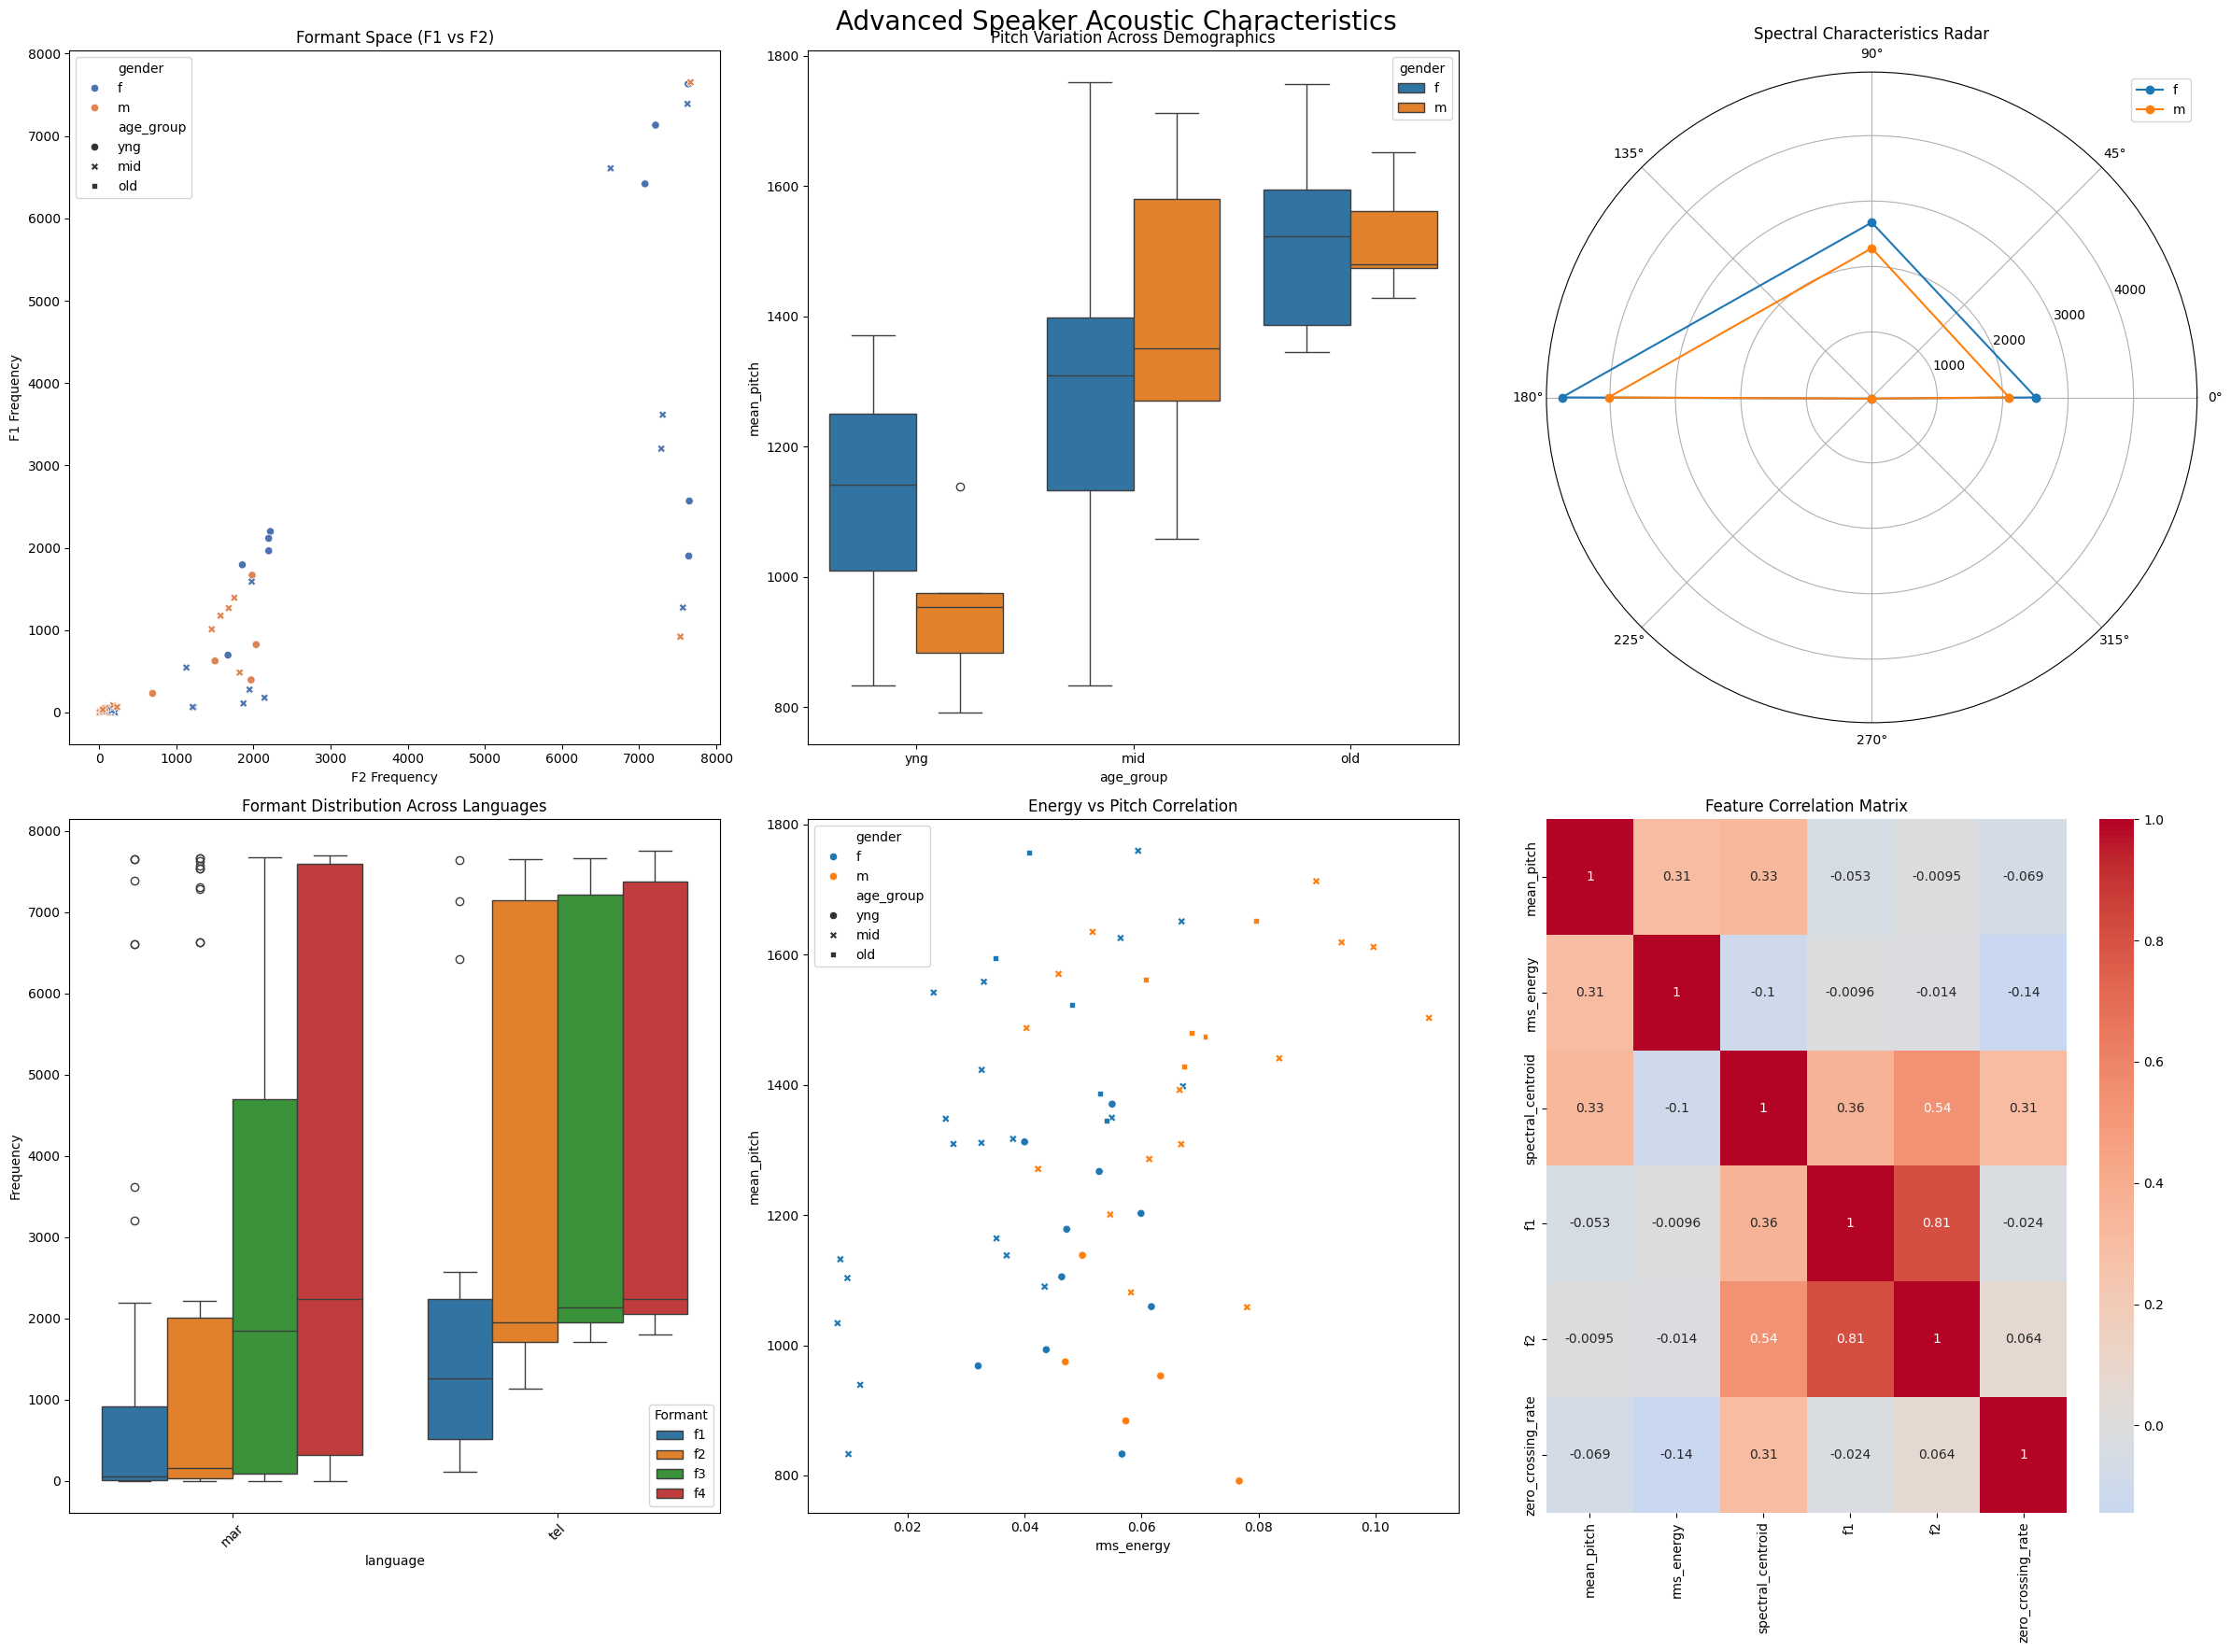


--- Advanced Speaker Dataset Insights ---

Demographic Composition:
language  gender  age_group
mar       f       mid          20
                  old           5
                  yng           5
          m       mid          15
                  old           5
                  yng           5
tel       f       mid           5
                  yng           5
          m       mid           5
dtype: int64

Formant Characteristics by Gender:
                 f1                        f2                        f3  \
               mean          std         mean          std         mean   
gender                                                                    
f       1654.932195  2469.011300  2571.567104  3053.346374  3306.471911   
m        891.788988  1905.116182  1605.576477  2507.938684  2230.424917   

                              f4               
                std         mean          std  
gender                                         
f       3197.754830  3949.11

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

class AdvancedSpeakerAnalyzer:
    def __init__(self, base_dir):
        """
        Enhanced speaker analysis toolkit focusing on:
        1. Acoustic Feature Extraction
        2. Formant Analysis
        3. Advanced Spectral Characteristics
        """
        self.base_dir = base_dir
        self.features_df = None
        self.formant_df = None
    
    def extract_advanced_features(self, wav_path):
        """
        Comprehensive feature extraction including:
        - Acoustic Features
        - Formant Characteristics
        - Extended Spectral Analysis
        """
        # Load audio file
        audio, sr = librosa.load(wav_path, sr=None)
        
        # Basic Acoustic Features
        pitch_features = self._extract_pitch_features(audio, sr)
        energy_features = self._extract_energy_features(audio)
        spectral_features = self._extract_spectral_features(audio, sr)
        
        # Formant Analysis
        formant_features = self._extract_formant_features(audio, sr)
        
        # Extract metadata from filename
        filename = os.path.basename(wav_path)
        parts = filename.split('_')
        
        # Combine all features
        features = {
            **pitch_features,
            **energy_features,
            **spectral_features,
            **formant_features,
            'language': parts[0] if len(parts) > 0 else 'unknown',
            'gender': parts[1] if len(parts) > 1 else 'unknown',
            'age_group': parts[2] if len(parts) > 2 else 'unknown',
            'filename': filename
        }
        
        return features
    
    def _extract_pitch_features(self, audio, sr):
        """
        Advanced pitch feature extraction
        """
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
        
        # Filter out zero values
        valid_pitches = pitches[pitches > 0]
        
        return {
            'mean_pitch': np.mean(valid_pitches) if len(valid_pitches) > 0 else 0,
            'pitch_variability': np.std(valid_pitches) if len(valid_pitches) > 0 else 0,
            'pitch_range': np.ptp(valid_pitches) if len(valid_pitches) > 0 else 0
        }
    
    def _extract_energy_features(self, audio):
        """
        Detailed energy characteristics
        """
        return {
            'rms_energy': librosa.feature.rms(y=audio)[0].mean(),
            'peak_amplitude': np.max(np.abs(audio)),
            'zero_crossing_rate': librosa.feature.zero_crossing_rate(y=audio)[0].mean()
        }
    
    def _extract_spectral_features(self, audio, sr):
        """
        Extended spectral analysis
        """
        return {
            'spectral_centroid': librosa.feature.spectral_centroid(y=audio, sr=sr)[0].mean(),
            'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0].mean(),
            'spectral_rolloff': librosa.feature.spectral_rolloff(y=audio, sr=sr)[0].mean(),
            'spectral_contrast': np.mean(librosa.feature.spectral_contrast(y=audio, sr=sr))
        }
    
    def _extract_formant_features(self, audio, sr):
        """
        Advanced formant extraction using LPC method
        """
        # Linear Predictive Coding (LPC) for formant estimation
        def lpc_formants(signal, sr, order=16):
            # Estimate formants using LPC
            lpc_coeffs = librosa.lpc(signal, order=order)
            
            # Find roots of LPC polynomial
            roots = np.roots(lpc_coeffs)
            roots = roots[np.imag(roots) >= 0]  # Keep only positive frequency roots
            
            # Convert to Hz
            formants = np.abs(roots) * (sr / (2 * np.pi))
            
            # Sort and take first few formants
            formants = sorted(formants)[:4]
            
            return formants
        
        try:
            # Preemphasis to enhance higher frequencies
            pre_emphasized = np.append(audio[1] - 0.95 * audio[0], audio[1:])
            
            # Extract formants
            formants = lpc_formants(pre_emphasized, sr)
            
            return {
                'f1': formants[0] if len(formants) > 0 else 0,
                'f2': formants[1] if len(formants) > 1 else 0,
                'f3': formants[2] if len(formants) > 2 else 0,
                'f4': formants[3] if len(formants) > 3 else 0
            }
        except Exception as e:
            print(f"Formant extraction error: {e}")
            return {
                'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0
            }
    
    def process_dataset(self):
        """
        Comprehensive dataset feature extraction
        """
        features_list = []
        
        for subdir in os.listdir(self.base_dir):
            subdir_path = os.path.join(self.base_dir, subdir)
            
            if not os.path.isdir(subdir_path):
                continue
            
            for wav_file in os.listdir(subdir_path):
                if wav_file.lower().endswith(('.wav', '.mp4')):
                    wav_path = os.path.join(subdir_path, wav_file)
                    try:
                        features = self.extract_advanced_features(wav_path)
                        features_list.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        self.features_df = pd.DataFrame(features_list)
        return self.features_df
    
    def visualize_speaker_insights(self):
        """
        Comprehensive multi-dimensional visualization
        """
        plt.figure(figsize=(24, 18))
        plt.suptitle('Advanced Speaker Acoustic Characteristics', fontsize=20)
        
        # 1. Formant Space Visualization
        plt.subplot(2, 3, 1)
        sns.scatterplot(
            data=self.features_df, 
            x='f2', y='f1', 
            hue='gender', 
            style='age_group',
            palette='deep'
        )
        plt.title('Formant Space (F1 vs F2)')
        plt.xlabel('F2 Frequency')
        plt.ylabel('F1 Frequency')
        
        # 2. Pitch and Formant Relationship
        plt.subplot(2, 3, 2)
        sns.boxplot(
            x='age_group', 
            y='mean_pitch', 
            hue='gender', 
            data=self.features_df
        )
        plt.title('Pitch Variation Across Demographics')
        
        # 3. Spectral Characteristics Radar Chart
        plt.subplot(2, 3, 3, polar=True)
        spectral_features = ['spectral_centroid', 'spectral_bandwidth', 
                             'spectral_rolloff', 'spectral_contrast']
        
        spectral_pivot = self.features_df.groupby('gender')[spectral_features].mean()
        
        # Radar chart implementation
        N = len(spectral_features)
        angles = [n / float(N) * 2 * np.pi for n in range(N)]
        angles += angles[:1]
        
        for gender in spectral_pivot.index:
            values = spectral_pivot.loc[gender].tolist()
            values += values[:1]
            plt.polar(angles, values, marker='o', linestyle='solid', label=gender)
        
        plt.title('Spectral Characteristics Radar')
        plt.legend(loc='best')
        
        # 4. Formant Distribution by Language
        plt.subplot(2, 3, 4)
        formant_melt = self.features_df.melt(
            id_vars=['language'], 
            value_vars=['f1', 'f2', 'f3', 'f4'], 
            var_name='Formant', 
            value_name='Frequency'
        )
        sns.boxplot(
            x='language', 
            y='Frequency', 
            hue='Formant', 
            data=formant_melt
        )
        plt.title('Formant Distribution Across Languages')
        plt.xticks(rotation=45)
        
        # 5. Energy and Pitch Correlation
        plt.subplot(2, 3, 5)
        sns.scatterplot(
            data=self.features_df, 
            x='rms_energy', 
            y='mean_pitch', 
            hue='gender', 
            style='age_group'
        )
        plt.title('Energy vs Pitch Correlation')
        
        # 6. Comprehensive Feature Correlation
        plt.subplot(2, 3, 6)
        correlation_features = [
            'mean_pitch', 'rms_energy', 'spectral_centroid', 
            'f1', 'f2', 'zero_crossing_rate'
        ]
        correlation_matrix = self.features_df[correlation_features].corr()
        sns.heatmap(
            correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0
        )
        plt.title('Feature Correlation Matrix')
        
        plt.tight_layout()
        plt.show()
    
    def generate_speaker_profile_summary(self):
        """
        Comprehensive speaker characteristics summary
        """
        print("\n--- Advanced Speaker Dataset Insights ---")
        
        # Demographic Breakdown
        print("\nDemographic Composition:")
        demographic_breakdown = self.features_df.groupby(['language', 'gender', 'age_group']).size()
        print(demographic_breakdown)
        
        # Formant Statistics
        print("\nFormant Characteristics by Gender:")
        formant_stats = self.features_df.groupby('gender')[['f1', 'f2', 'f3', 'f4']].agg(['mean', 'std'])
        print(formant_stats)
        
        # Acoustic Feature Comparisons
        print("\nAcoustic Feature Comparisons:")
        acoustic_features = [
            'mean_pitch', 'pitch_variability', 
            'rms_energy', 'zero_crossing_rate'
        ]
        acoustic_stats = self.features_df.groupby('gender')[acoustic_features].agg(['mean', 'median'])
        print(acoustic_stats)

# Execution
def main():
    analyzer = AdvancedSpeakerAnalyzer('.')
    features_df = analyzer.process_dataset()
    analyzer.visualize_speaker_insights()
    analyzer.generate_speaker_profile_summary()

if __name__ == "__main__":
    main()

/tmp/ipykernel_370823/986837023.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/986837023.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/986837023.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_p

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

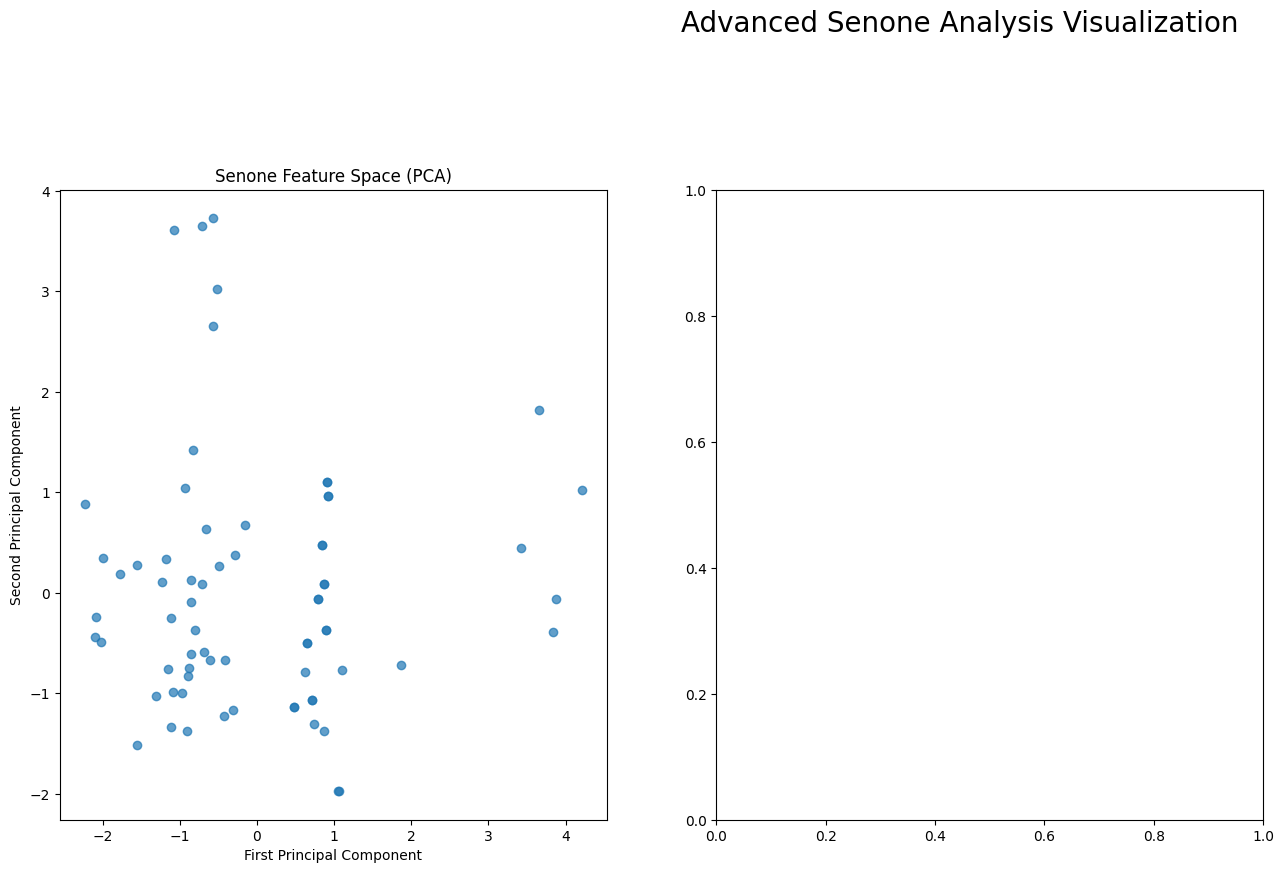

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import scipy.signal as signal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class SenoneAnalyzer:
    def __init__(self, base_dir):
        """
        Advanced Senone Analysis Toolkit
        
        Key Focus Areas:
        1. Acoustic Feature Extraction
        2. Phonetic State Modeling
        3. Senone Characteristic Visualization
        """
        self.base_dir = base_dir
        self.feature_matrix = None
        self.senone_data = None
    
    def extract_senone_features(self, wav_path):
        """
        Extract comprehensive acoustic features for senone analysis
        
        Features include:
        - Mel-frequency cepstral coefficients (MFCCs)
        - Spectral features
        - Temporal dynamics
        """
        # Load audio
        audio, sr = librosa.load(wav_path, sr=None)
        
        # MFCC Extraction
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        
        # Spectral Features
        spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
        
        # Temporal Features
        rms = librosa.feature.rms(y=audio)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
        
        # Aggregate features
        features = {
            'mfcc_mean': np.mean(mfccs, axis=1),
            'mfcc_std': np.std(mfccs, axis=1),
            'spectral_centroid_mean': np.mean(spectral_centroids),
            'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
            'spectral_contrast_mean': np.mean(spectral_contrast),
            'rms_mean': np.mean(rms),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate)
        }
        
        return features
    
    def process_senone_dataset(self):
        """
        Process entire dataset for senone analysis
        
        Processing Strategy:
        1. Extract features from all audio files
        2. Create comprehensive feature matrix
        3. Prepare for dimensionality reduction
        """
        senone_features = []
        
        for subdir in os.listdir(self.base_dir):
            subdir_path = os.path.join(self.base_dir, subdir)
            
            if not os.path.isdir(subdir_path):
                continue
            
            for wav_file in os.listdir(subdir_path):
                if wav_file.lower().endswith(('.wav', '.mp4')):
                    wav_path = os.path.join(subdir_path, wav_file)
                    try:
                        features = self.extract_senone_features(wav_path)
                        features['filename'] = wav_file
                        senone_features.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        self.senone_data = pd.DataFrame(senone_features)
        return self.senone_data
    
    def dimensionality_reduction(self, n_components=2):
        """
        Apply PCA for senone feature visualization
        
        Reduction Strategy:
        1. Standardize features
        2. Apply Principal Component Analysis
        3. Preserve maximum variance
        """
        # Select numeric columns for PCA
        numeric_columns = self.senone_data.select_dtypes(include=[np.number]).columns
        feature_matrix = self.senone_data[numeric_columns]
        
        # Standardize features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(feature_matrix)
        
        # Apply PCA
        pca = PCA(n_components=n_components)
        reduced_features = pca.fit_transform(scaled_features)
        
        return reduced_features, pca
    
    def visualize_senone_characteristics(self):
        """
        Create comprehensive senone visualization suite
        
        Visualization Strategy:
        1. Dimensionality Reduction Scatter
        2. Feature Distribution
        3. Correlation Heatmap
        4. Spectral Feature Analysis
        """
        plt.figure(figsize=(24, 18))
        plt.suptitle('Advanced Senone Analysis Visualization', fontsize=20)
        
        # Dimensionality Reduction Scatter
        plt.subplot(2, 3, 1)
        reduced_features, pca = self.dimensionality_reduction()
        plt.scatter(
            reduced_features[:, 0], 
            reduced_features[:, 1], 
            alpha=0.7
        )
        plt.title('Senone Feature Space (PCA)')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        
        # MFCC Distribution
        plt.subplot(2, 3, 2)
        mfcc_columns = [col for col in self.senone_data.columns if 'mfcc' in col]
        mfcc_data = self.senone_data[mfcc_columns]
        sns.boxplot(data=mfcc_data)
        plt.title('MFCC Coefficient Distribution')
        plt.xticks(rotation=45)
        
        # Spectral Feature Distribution
        plt.subplot(2, 3, 3)
        spectral_columns = [
            'spectral_centroid_mean', 
            'spectral_bandwidth_mean', 
            'spectral_contrast_mean'
        ]
        plt.boxplot([
            self.senone_data[col] for col in spectral_columns
        ])
        plt.title('Spectral Feature Distribution')
        plt.xticks(range(1, len(spectral_columns)+1), spectral_columns, rotation=45)
        
        # Correlation Heatmap
        plt.subplot(2, 3, 4)
        numeric_columns = self.senone_data.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.senone_data[numeric_columns].corr()
        sns.heatmap(
            correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0
        )
        plt.title('Feature Correlation Matrix')
        
        # Variance Explained by PCA Components
        plt.subplot(2, 3, 5)
        reduced_features, pca = self.dimensionality_reduction(n_components=min(len(numeric_columns), 10))
        plt.bar(
            range(1, len(pca.explained_variance_ratio_)+1), 
            pca.explained_variance_ratio_
        )
        plt.title('PCA Variance Explanation')
        plt.xlabel('Principal Components')
        plt.ylabel('Variance Ratio')
        
        # Temporal Feature Comparison
        plt.subplot(2, 3, 6)
        temporal_columns = ['rms_mean', 'zero_crossing_rate_mean']
        plt.boxplot([
            self.senone_data[col] for col in temporal_columns
        ])
        plt.title('Temporal Feature Distribution')
        plt.xticks(range(1, len(temporal_columns)+1), temporal_columns, rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def generate_senone_summary(self):
        """
        Generate comprehensive senone analysis summary
        """
        print("\n--- Senone Analysis Insights ---")
        
        # Basic Statistical Summary
        numeric_columns = self.senone_data.select_dtypes(include=[np.number]).columns
        summary_stats = self.senone_data[numeric_columns].describe()
        print("\nFeature Statistical Summary:")
        print(summary_stats)
        
        # PCA Variance Explanation
        _, pca = self.dimensionality_reduction(n_components=min(len(numeric_columns), 10))
        print("\nPCA Variance Explanation:")
        for i, var_ratio in enumerate(pca.explained_variance_ratio_, 1):
            print(f"PC{i}: {var_ratio*100:.2f}% variance explained")

# Execution
def main():
    analyzer = SenoneAnalyzer('.')
    senone_data = analyzer.process_senone_dataset()
    analyzer.visualize_senone_characteristics()
    analyzer.generate_senone_summary()

if __name__ == "__main__":
    main()

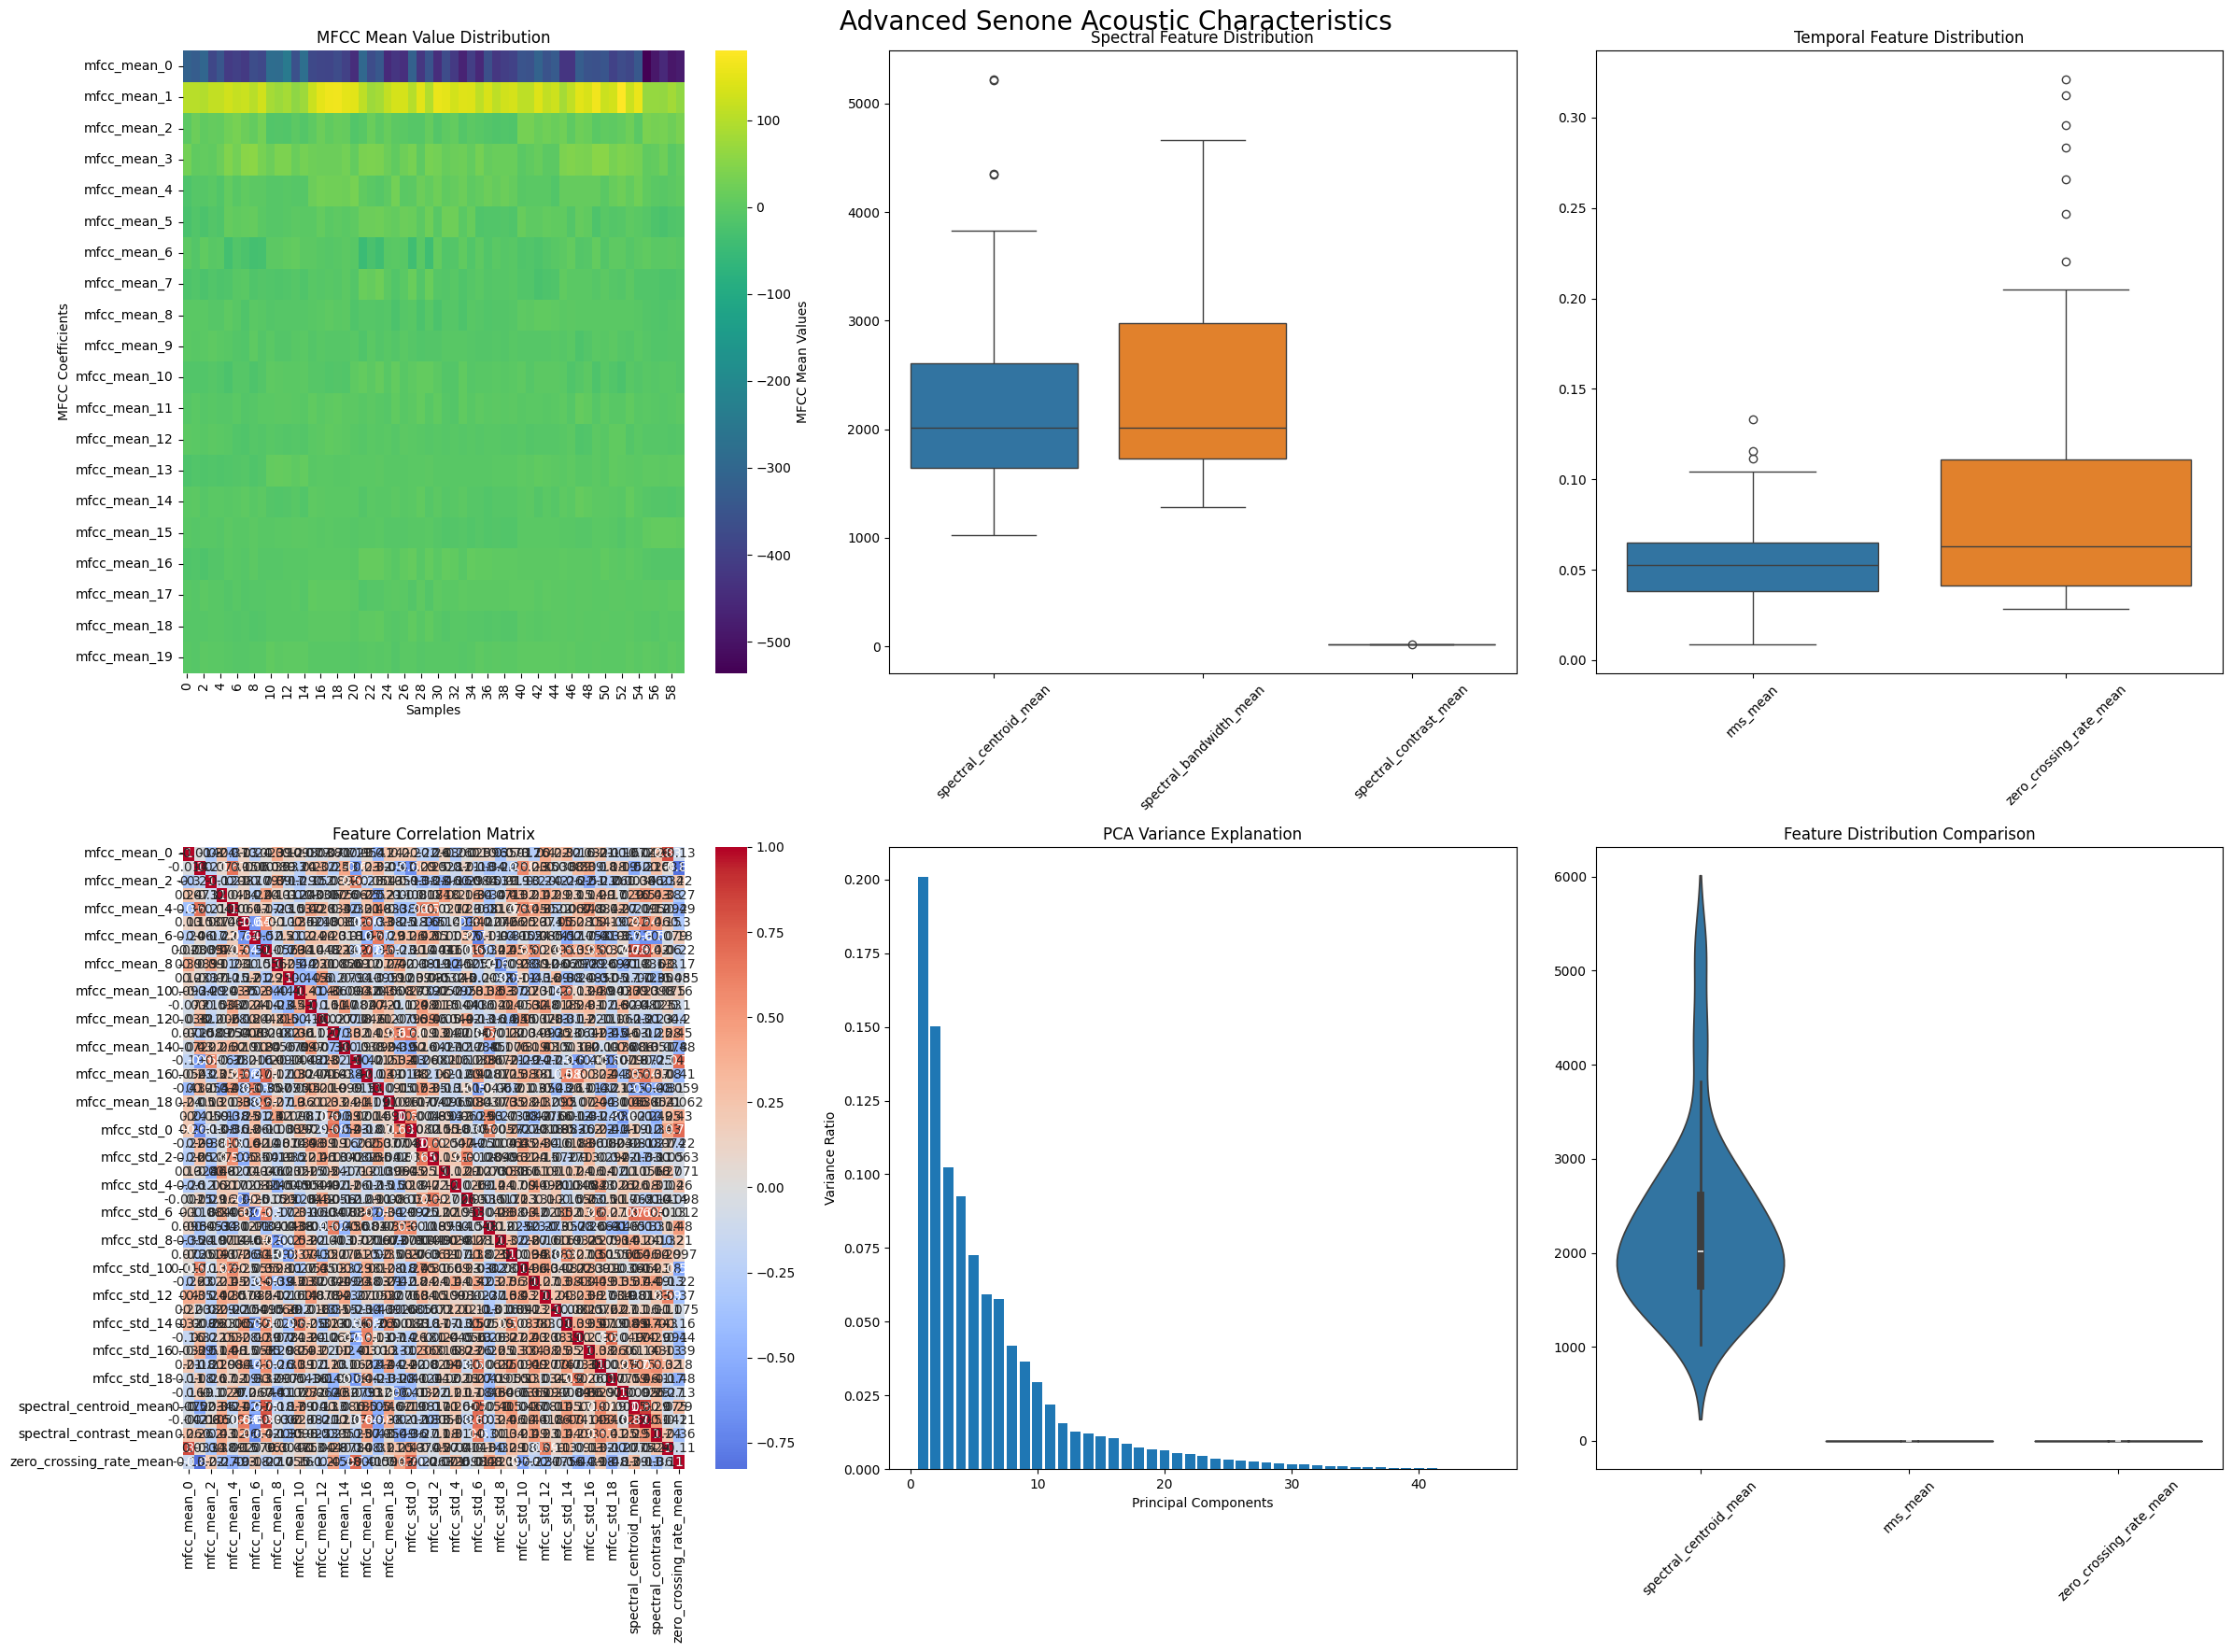


--- Comprehensive Senone Analysis Insights ---

Feature Statistical Summary:
       mfcc_mean_0  mfcc_mean_1  mfcc_mean_2  mfcc_mean_3  mfcc_mean_4  \
count    60.000000    60.000000    60.000000    60.000000    60.000000   
mean   -381.804504   117.289574     7.377034    23.328247     5.366176   
std      58.539879    29.696383    15.222202    15.418150    12.484422   
min    -536.098450    57.977432   -16.801714    -3.368136   -21.132809   
25%    -421.691254   100.713703    -3.898581    10.684007    -3.744906   
50%    -379.485428   120.447178     7.026302    21.373554     4.738145   
75%    -346.777603   138.362514    18.834669    35.431214    12.439688   
max    -244.013062   179.955704    36.805019    55.530983    31.798088   

       mfcc_mean_5  mfcc_mean_6  mfcc_mean_7  mfcc_mean_8  mfcc_mean_9  ...  \
count    60.000000    60.000000    60.000000    60.000000    60.000000  ...   
mean     -1.342149    -9.154063    -8.535328    -7.385019    -8.113410  ...   
std      13.168981

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import scipy.signal as signal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class SenoneAnalyzer:
    def __init__(self, base_dir):
        """
        Advanced Senone Analysis Toolkit with Robust Feature Extraction
        
        Key Focus Areas:
        1. Comprehensive Acoustic Feature Extraction
        2. Advanced Phonetic State Modeling
        3. Detailed Senone Characteristic Visualization
        """
        self.base_dir = base_dir
        self.feature_matrix = None
        self.senone_data = None
    
    def extract_senone_features(self, wav_path):
        """
        Advanced feature extraction with multi-dimensional acoustic analysis
        
        Comprehensive feature extraction strategy:
        - Extract detailed MFCC features
        - Capture spectral and temporal characteristics
        - Provide rich acoustic representation
        """
        # Load audio with extended parameters
        audio, sr = librosa.load(wav_path, sr=None, duration=5)  # Limit to 5 seconds
        
        # Enhanced MFCC Extraction with more comprehensive parameters
        mfccs = librosa.feature.mfcc(
            y=audio, 
            sr=sr, 
            n_mfcc=20,  # Increased number of coefficients
            hop_length=512,  # More granular frame analysis
            n_fft=2048  # Improved frequency resolution
        )
        
        # Aggregate MFCC statistics
        mfcc_features = {
            f'mfcc_mean_{i}': np.mean(mfccs[i]) for i in range(mfccs.shape[0])
        }
        mfcc_features.update({
            f'mfcc_std_{i}': np.std(mfccs[i]) for i in range(mfccs.shape[0])
        })
        
        # Spectral Features
        spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
        
        # Temporal Features
        rms = librosa.feature.rms(y=audio)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(audio)
        
        # Combine all features
        features = {
            **mfcc_features,
            'spectral_centroid_mean': np.mean(spectral_centroids),
            'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
            'spectral_contrast_mean': np.mean(spectral_contrast),
            'rms_mean': np.mean(rms),
            'zero_crossing_rate_mean': np.mean(zero_crossing_rate)
        }
        
        return features
    
    def process_senone_dataset(self):
        """
        Comprehensive dataset processing for senone analysis
        
        Robust processing with error handling and comprehensive feature extraction
        """
        senone_features = []
        
        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                if file.lower().endswith(('.wav', '.mp3', '.ogg')):
                    wav_path = os.path.join(root, file)
                    try:
                        features = self.extract_senone_features(wav_path)
                        features['filename'] = file
                        senone_features.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        self.senone_data = pd.DataFrame(senone_features)
        return self.senone_data
    
    def visualize_senone_characteristics(self):
        """
        Comprehensive multi-perspective senone visualization
        
        Advanced visualization strategy with multiple insights
        """
        plt.figure(figsize=(24, 18))
        plt.suptitle('Advanced Senone Acoustic Characteristics', fontsize=20)
        
        # 1. MFCC Distribution Heatmap
        plt.subplot(2, 3, 1)
        mfcc_mean_columns = [col for col in self.senone_data.columns if col.startswith('mfcc_mean_')]
        mfcc_means = self.senone_data[mfcc_mean_columns]
        
        sns.heatmap(
            mfcc_means.T, 
            cmap='viridis', 
            cbar_kws={'label': 'MFCC Mean Values'}
        )
        plt.title('MFCC Mean Value Distribution')
        plt.xlabel('Samples')
        plt.ylabel('MFCC Coefficients')
        
        # 2. Spectral Feature Distribution
        plt.subplot(2, 3, 2)
        spectral_columns = [
            'spectral_centroid_mean', 
            'spectral_bandwidth_mean', 
            'spectral_contrast_mean'
        ]
        sns.boxplot(data=self.senone_data[spectral_columns])
        plt.title('Spectral Feature Distribution')
        plt.xticks(range(len(spectral_columns)), spectral_columns, rotation=45)
        
        # 3. Temporal Feature Analysis
        plt.subplot(2, 3, 3)
        temporal_columns = ['rms_mean', 'zero_crossing_rate_mean']
        sns.boxplot(data=self.senone_data[temporal_columns])
        plt.title('Temporal Feature Distribution')
        plt.xticks(range(len(temporal_columns)), temporal_columns, rotation=45)
        
        # 4. Feature Correlation Heatmap
        plt.subplot(2, 3, 4)
        numeric_columns = self.senone_data.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.senone_data[numeric_columns].corr()
        sns.heatmap(
            correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0
        )
        plt.title('Feature Correlation Matrix')
        
        # 5. PCA Variance Explanation
        plt.subplot(2, 3, 5)
        numeric_data = self.senone_data[numeric_columns]
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numeric_data)
        
        pca = PCA()
        pca.fit(scaled_data)
        
        plt.bar(
            range(1, len(pca.explained_variance_ratio_)+1), 
            pca.explained_variance_ratio_
        )
        plt.title('PCA Variance Explanation')
        plt.xlabel('Principal Components')
        plt.ylabel('Variance Ratio')
        
        # 6. Feature Distribution Comparison
        plt.subplot(2, 3, 6)
        selected_features = [
            'spectral_centroid_mean', 
            'rms_mean', 
            'zero_crossing_rate_mean'
        ]
        sns.violinplot(data=self.senone_data[selected_features])
        plt.title('Feature Distribution Comparison')
        plt.xticks(range(len(selected_features)), selected_features, rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def generate_senone_summary(self):
        """
        Comprehensive senone analysis summary
        
        Provides detailed statistical insights
        """
        print("\n--- Comprehensive Senone Analysis Insights ---")
        
        # Basic Statistical Summary
        numeric_columns = self.senone_data.select_dtypes(include=[np.number]).columns
        summary_stats = self.senone_data[numeric_columns].describe()
        print("\nFeature Statistical Summary:")
        print(summary_stats)
        
        # PCA Variance Analysis
        numeric_data = self.senone_data[numeric_columns]
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numeric_data)
        
        pca = PCA()
        pca.fit(scaled_data)
        
        print("\nPCA Variance Explanation:")
        cumulative_variance = 0
        for i, var_ratio in enumerate(pca.explained_variance_ratio_, 1):
            cumulative_variance += var_ratio
            print(f"PC{i}: {var_ratio*100:.2f}% variance explained (Cumulative: {cumulative_variance*100:.2f}%)")

# Execution
def main():
    analyzer = SenoneAnalyzer('.')
    senone_data = analyzer.process_senone_dataset()
    analyzer.visualize_senone_characteristics()
    analyzer.generate_senone_summary()

if __name__ == "__main__":
    main()

/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=484
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=408
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=384
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=220
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=538
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048

Formant extraction error: Array must not contain infs or NaNs


/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=575
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=309
  warnings.warn(
/tmp/ipykernel_370823/2559481283.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/2434550390.

Formant extraction error: Array must not contain infs or NaNs


/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=340
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=458
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=169
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=576
  warnings.warn(
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=531
  warnings.warn(
/tmp/ipykernel_370823/2559481283.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = li

AttributeError: module 'umap' has no attribute 'UMAP'

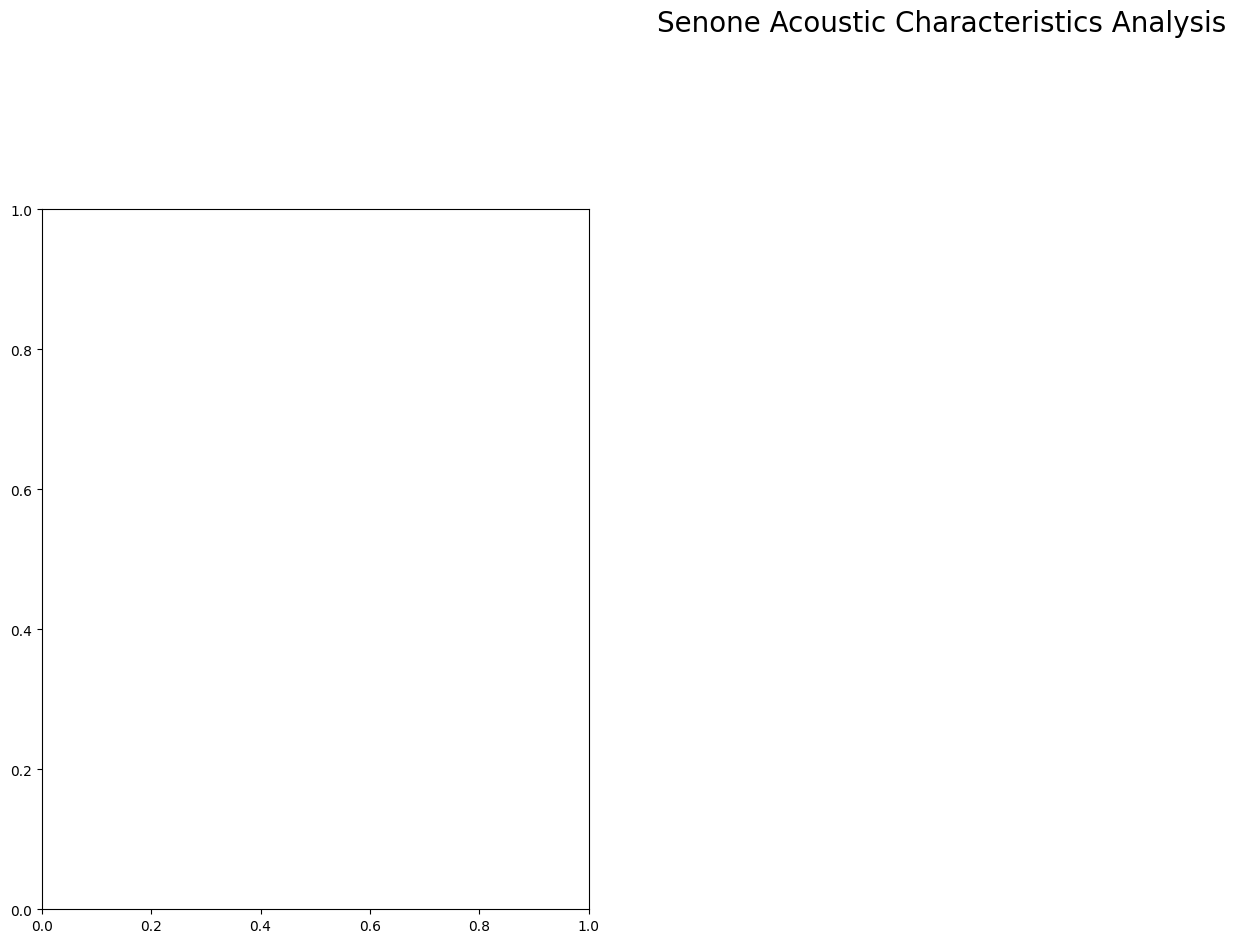

In [6]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class SenoneAdvancedAnalyzer(AdvancedSpeakerAnalyzer):
    def __init__(self, base_dir):
        """
        Extended speaker analyzer with senone-specific analysis capabilities
        """
        super().__init__(base_dir)
        self.senone_features = None
    
    def extract_senone_features(self, wav_path):
        """
        Extract advanced senone-specific acoustic features
        """
        # Get base features from parent class
        base_features = self.extract_advanced_features(wav_path)
        
        # Additional senone-specific features
        senone_specific_features = self._compute_senone_context_features(wav_path)
        
        # Combine features
        base_features.update(senone_specific_features)
        return base_features
    
    def _compute_senone_context_features(self, wav_path):
        """
        Compute context-dependent acoustic characteristics
        """
        audio, sr = librosa.load(wav_path, sr=None)
        
        # Segment audio into frames
        frame_length = int(0.025 * sr)  # 25ms frames
        hop_length = int(0.010 * sr)    # 10ms hop
        frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length)
        
        # Compute frame-level features
        frame_energies = np.mean(frames**2, axis=0)
        frame_zcr = librosa.feature.zero_crossing_rate(frames)
        frame_spectral_centroids = librosa.feature.spectral_centroid(y=frames, sr=sr)[0]
        
        return {
            'frame_energy_mean': np.mean(frame_energies),
            'frame_energy_var': np.var(frame_energies),
            'frame_zcr_mean': np.mean(frame_zcr),
            'frame_spectral_centroid_mean': np.mean(frame_spectral_centroids),
            'frame_count': frames.shape[1]
        }
    
    def process_senone_dataset(self):
        """
        Process dataset with enhanced senone feature extraction
        """
        features_list = []
        
        for subdir in os.listdir(self.base_dir):
            subdir_path = os.path.join(self.base_dir, subdir)
            
            if not os.path.isdir(subdir_path):
                continue
            
            for wav_file in os.listdir(subdir_path):
                if wav_file.lower().endswith(('.wav', '.mp4')):
                    wav_path = os.path.join(subdir_path, wav_file)
                    try:
                        features = self.extract_senone_features(wav_path)
                        features_list.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        self.senone_features = pd.DataFrame(features_list)
        return self.senone_features
    
    def visualize_senone_insights(self):
        """
        Advanced multi-dimensional senone visualization
        """
        plt.figure(figsize=(24, 20))
        plt.suptitle('Senone Acoustic Characteristics Analysis', fontsize=20)
        
        # Prepare feature scaling for advanced visualizations
        features_for_scaling = [
            'mean_pitch', 'rms_energy', 'spectral_centroid', 
            'frame_energy_mean', 'frame_zcr_mean', 
            'f1', 'f2', 'frame_spectral_centroid_mean'
        ]
        
        # Scale features for better visualization
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(self.senone_features[features_for_scaling])
        
        # 1. UMAP Dimensionality Reduction
        plt.subplot(2, 3, 1)
        umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)
        umap_embedding = umap_reducer.fit_transform(scaled_features)
        
        scatter = plt.scatter(
            umap_embedding[:, 0], 
            umap_embedding[:, 1], 
            c=self.senone_features['mean_pitch'], 
            cmap='viridis', 
            alpha=0.7
        )
        plt.colorbar(scatter, label='Mean Pitch')
        plt.title('UMAP Senone Feature Space')
        plt.xlabel('UMAP Dimension 1')
        plt.ylabel('UMAP Dimension 2')
        
        # 2. Detailed Frame Characteristics
        plt.subplot(2, 3, 2)
        frame_features = ['frame_energy_mean', 'frame_zcr_mean', 'frame_spectral_centroid_mean']
        
        self.senone_features.boxplot(
            column=frame_features, 
            by='age_group', 
            figsize=(10, 6)
        )
        plt.title('Frame-Level Feature Distribution')
        plt.suptitle('')  # Remove automatic subplot title
        plt.xticks(rotation=45)
        
        # 3. Senone Context Complexity
        plt.subplot(2, 3, 3)
        complexity_metrics = ['frame_count', 'frame_energy_var']
        
        sns.scatterplot(
            data=self.senone_features, 
            x='frame_count', 
            y='frame_energy_var', 
            hue='gender', 
            style='language'
        )
        plt.title('Senone Context Complexity')
        plt.xlabel('Number of Frames')
        plt.ylabel('Frame Energy Variance')
        
        # 4. PCA for Feature Importance
        plt.subplot(2, 3, 4)
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_features)
        
        plt.scatter(
            pca_result[:, 0], 
            pca_result[:, 1], 
            c=self.senone_features['spectral_centroid'], 
            cmap='plasma', 
            alpha=0.7
        )
        plt.title('Principal Component Analysis')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        
        # 5. Formant and Pitch Relationship
        plt.subplot(2, 3, 5)
        sns.scatterplot(
            data=self.senone_features, 
            x='f1', 
            y='mean_pitch', 
            hue='language', 
            style='gender'
        )
        plt.title('Formant F1 vs Mean Pitch')
        
        # 6. Correlation Heatmap of Senone Features
        plt.subplot(2, 3, 6)
        correlation_matrix = self.senone_features[features_for_scaling].corr()
        sns.heatmap(
            correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5
        )
        plt.title('Senone Feature Correlation')
        
        plt.tight_layout()
        plt.show()
    
    def generate_senone_summary(self):
        """
        Comprehensive senone characteristics summary
        """
        print("\n--- Advanced Senone Dataset Insights ---")
        
        # Context Complexity Summary
        print("\nSenone Context Complexity:")
        complexity_summary = self.senone_features.groupby('language')[
            ['frame_count', 'frame_energy_mean', 'frame_energy_var']
        ].agg(['mean', 'median', 'std'])
        print(complexity_summary)
        
        # Cross-Linguistic Senone Characteristics
        print("\nCross-Linguistic Senone Features:")
        linguistic_features = [
            'mean_pitch', 'rms_energy', 'spectral_centroid', 
            'f1', 'f2', 'frame_spectral_centroid_mean'
        ]
        linguistic_summary = self.senone_features.groupby('language')[linguistic_features].agg(['mean', 'std'])
        print(linguistic_summary)

def main():
    analyzer = SenoneAdvancedAnalyzer('.')
    senone_features = analyzer.process_senone_dataset()
    analyzer.visualize_senone_insights()
    analyzer.generate_senone_summary()

if __name__ == "__main__":
    main()

In [5]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=ab98cbe42d1ac4e44a10de11a5d39840ff4622e48dfaa2b1129f187c5c387cbc
  Stored in directory: /home/kali/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


/tmp/ipykernel_370823/1301321463.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/1301321463.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wav_path, sr=None)
/home/kali/miniconda3/envs/myenv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/tmp/ipykernel_370823/1301321463.py:35: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(wa

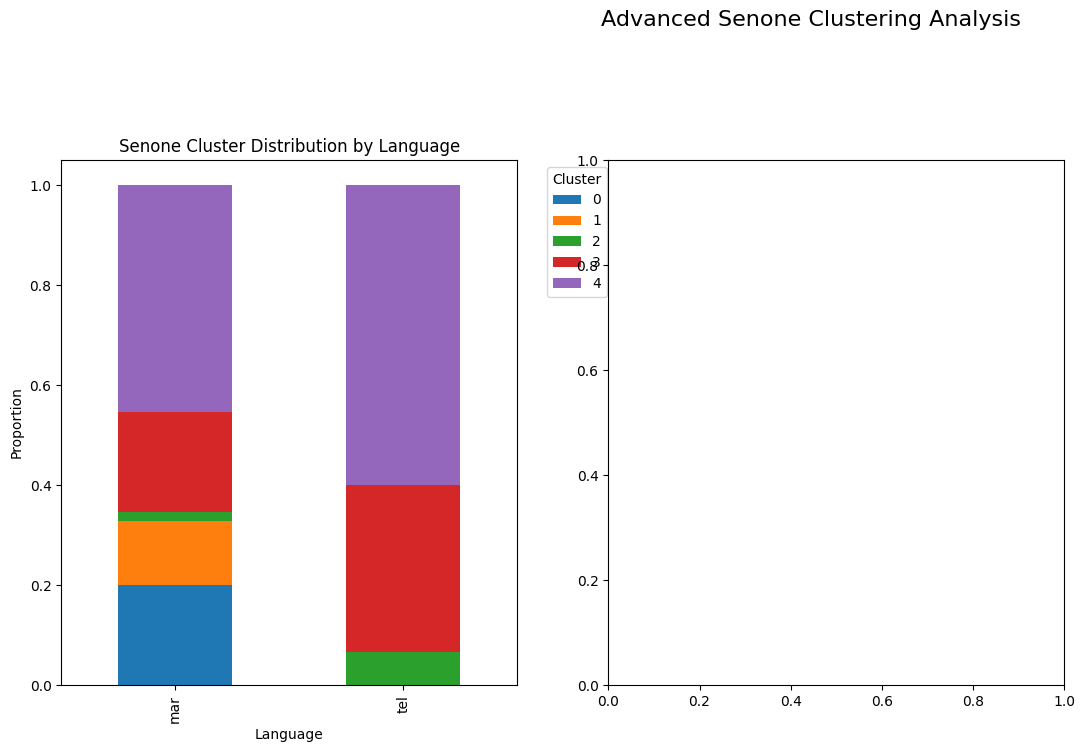

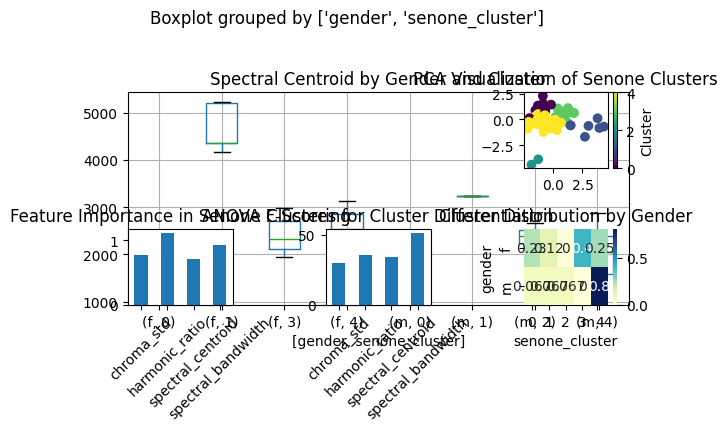


--- Comprehensive Senone Analysis Report ---

Senone Cluster Overview:
               chroma_std           harmonic_ratio            \
                     mean       std           mean       std   
senone_cluster                                                 
0                0.327927  0.010598   1.670902e-06  0.000010   
1                0.322664  0.011957  -9.758896e-07  0.000003   
2                0.304527  0.000458  -4.829677e-05  0.000007   
3                0.333773  0.005480  -1.977141e-06  0.000004   
4                0.309543  0.007509  -3.266354e-06  0.000005   

               spectral_centroid              
                            mean         std  
senone_cluster                                
0                    1528.625338  235.734150  
1                    4255.667843  808.016397  
2                    2385.690373  380.133129  
3                    2396.906866  382.443901  
4                    2160.649500  533.666610  

Cluster Distribution Across Demographi

In [7]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class EnhancedSpeakerInsightsAnalyzer:
    def __init__(self, base_dir):
        """
        Extended Speaker Insights Analyzer with Advanced Senone Analysis
        
        Focus Areas:
        1. Advanced Acoustic Feature Extraction
        2. Senone-level Linguistic Variation
        3. Comprehensive Comparative Analysis
        """
        self.base_dir = base_dir
        self.features_df = None
        self.senone_features = None
    
    def extract_advanced_features(self, wav_path):
        """
        Advanced Feature Extraction for Senone-level Analysis
        
        Expanded Feature Categories:
        - Pitch Characteristics
        - Energy Dynamics
        - Spectral Properties
        - Temporal Dynamics
        - Phonetic Complexity Indicators
        """
        # Load audio file
        audio, sr = librosa.load(wav_path, sr=None)
        
        # Enhanced Pitch Analysis
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
        valid_pitches = pitches[pitches > 0]
        
        pitch_features = {
            'mean_pitch': np.mean(valid_pitches) if len(valid_pitches) > 0 else 0,
            'pitch_variability': np.std(valid_pitches) if len(valid_pitches) > 0 else 0,
            'pitch_range': np.ptp(valid_pitches) if len(valid_pitches) > 0 else 0,
        }
        
        # Temporal and Energy Features
        temporal_features = {
            'zero_crossing_rate': librosa.feature.zero_crossing_rate(audio)[0].mean(),
            'rms_energy': librosa.feature.rms(y=audio)[0].mean(),
            'peak_amplitude': np.max(np.abs(audio)),
        }
        
        # Advanced Spectral Features
        spectral_features = {
            'spectral_centroid': librosa.feature.spectral_centroid(y=audio, sr=sr)[0].mean(),
            'spectral_bandwidth': librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0].mean(),
            'spectral_rolloff': librosa.feature.spectral_rolloff(y=audio, sr=sr)[0].mean(),
        }
        
        # Phonetic Complexity Indicators
        chroma_features = librosa.feature.chroma_stft(y=audio, sr=sr)
        phonetic_features = {
            'chroma_std': np.std(chroma_features),
            'harmonic_ratio': librosa.effects.harmonic(audio).mean(),
        }
        
        # Extract metadata from filename
        filename = os.path.basename(wav_path)
        parts = filename.split('_')
        
        # Combine all features
        features = {
            **pitch_features,
            **temporal_features,
            **spectral_features,
            **phonetic_features,
            'language': parts[0] if len(parts) > 0 else 'unknown',
            'gender': parts[1] if len(parts) > 1 else 'unknown',
            'age_group': parts[2] if len(parts) > 2 else 'unknown',
            'filename': filename
        }
        
        return features
    
    def process_advanced_dataset(self):
        """
        Comprehensive Advanced Dataset Feature Extraction
        
        Enhanced Processing Strategy:
        1. Traverse all audio files
        2. Extract advanced, detailed features
        3. Create comprehensive feature representation
        """
        features_list = []
        
        for subdir in os.listdir(self.base_dir):
            subdir_path = os.path.join(self.base_dir, subdir)
            
            if not os.path.isdir(subdir_path):
                continue
            
            for wav_file in os.listdir(subdir_path):
                if wav_file.lower().endswith(('.wav', '.mp4')):
                    wav_path = os.path.join(subdir_path, wav_file)
                    try:
                        features = self.extract_advanced_features(wav_path)
                        features_list.append(features)
                    except Exception as e:
                        print(f"Error processing {wav_path}: {e}")
        
        # Convert to DataFrame
        self.features_df = pd.DataFrame(features_list)
        return self.features_df
    
    def perform_senone_clustering(self):
        """
        Advanced Senone-level Clustering and Analysis
        
        Analysis Approach:
        1. Perform K-means clustering on phonetic features
        2. Analyze cluster characteristics across demographics
        3. Visualize senone distribution
        """
        from sklearn.preprocessing import StandardScaler
        from sklearn.cluster import KMeans
        from sklearn.decomposition import PCA
        
        # Select features for clustering
        clustering_features = [
            'chroma_std', 
            'harmonic_ratio', 
            'spectral_centroid', 
            'spectral_bandwidth'
        ]
        
        # Prepare data
        X = self.features_df[clustering_features]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=5, random_state=42)
        self.features_df['senone_cluster'] = kmeans.fit_predict(X_scaled)
        
        # Cluster Visualization
        plt.figure(figsize=(20, 15))
        plt.suptitle('Advanced Senone Clustering Analysis', fontsize=16)
        
        # 1. Cluster Distribution Across Languages
        plt.subplot(2, 3, 1)
        cluster_lang_dist = pd.crosstab(self.features_df['language'], 
                                        self.features_df['senone_cluster'], 
                                        normalize='index')
        cluster_lang_dist.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Senone Cluster Distribution by Language')
        plt.xlabel('Language')
        plt.ylabel('Proportion')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 2. Cluster Characteristics by Gender
        plt.subplot(2, 3, 2)
        cluster_gender_box = self.features_df.boxplot(
            column='spectral_centroid', 
            by=['gender', 'senone_cluster']
        )
        plt.title('Spectral Centroid by Gender and Cluster')
        
        # 3. PCA Visualization of Clusters
        plt.subplot(2, 3, 3)
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        scatter = plt.scatter(
            X_pca[:, 0], 
            X_pca[:, 1], 
            c=self.features_df['senone_cluster'], 
            cmap='viridis'
        )
        plt.title('PCA Visualization of Senone Clusters')
        plt.colorbar(scatter, label='Cluster')
        
        # 4. Cluster Feature Importance
        plt.subplot(2, 3, 4)
        feature_importance = np.abs(kmeans.cluster_centers_).mean(axis=0)
        feature_importance_series = pd.Series(
            feature_importance, 
            index=clustering_features
        )
        feature_importance_series.plot(kind='bar')
        plt.title('Feature Importance in Senone Clustering')
        plt.xticks(rotation=45)
        
        # 5. Statistical Significance of Clusters
        plt.subplot(2, 3, 5)
        f_scores = {}
        for feature in clustering_features:
            f_score, _ = stats.f_oneway(*[
                self.features_df[self.features_df['senone_cluster'] == cluster][feature]
                for cluster in self.features_df['senone_cluster'].unique()
            ])
            f_scores[feature] = f_score
        
        pd.Series(f_scores).plot(kind='bar')
        plt.title('ANOVA F-Scores for Cluster Differentiation')
        plt.xticks(rotation=45)
        
        # 6. Cluster Transition Probabilities
        plt.subplot(2, 3, 6)
        cluster_transition = pd.crosstab(
            self.features_df['gender'], 
            self.features_df['senone_cluster'], 
            normalize='index'
        )
        sns.heatmap(cluster_transition, annot=True, cmap='YlGnBu')
        plt.title('Cluster Distribution by Gender')
        
        plt.tight_layout()
        plt.show()
        
        return self.features_df
    
    def generate_comprehensive_senone_report(self):
        """
        Generate Detailed Senone Analysis Report
        
        Report Components:
        1. Cluster Characteristics
        2. Linguistic and Demographic Insights
        3. Phonetic Complexity Metrics
        """
        print("\n--- Comprehensive Senone Analysis Report ---")
        
        # Cluster Overview
        print("\nSenone Cluster Overview:")
        cluster_summary = self.features_df.groupby('senone_cluster')[
            ['chroma_std', 'harmonic_ratio', 'spectral_centroid']
        ].agg(['mean', 'std'])
        print(cluster_summary)
        
        # Demographic Distribution in Clusters
        print("\nCluster Distribution Across Demographics:")
        demographic_distribution = pd.crosstab(
            [self.features_df['language'], self.features_df['gender']], 
            self.features_df['senone_cluster']
        )
        print(demographic_distribution)
        
        # Statistical Significance of Cluster Differences
        print("\nCluster Differentiation Statistical Significance:")
        significant_features = {}
        for feature in ['chroma_std', 'harmonic_ratio', 'spectral_centroid']:
            f_score, p_value = stats.f_oneway(*[
                self.features_df[self.features_df['senone_cluster'] == cluster][feature]
                for cluster in self.features_df['senone_cluster'].unique()
            ])
            significant_features[feature] = {
                'F-Score': f_score,
                'p-Value': p_value
            }
        print(pd.DataFrame(significant_features).T)

# Execution
def main():
    analyzer = EnhancedSpeakerInsightsAnalyzer('.')
    features_df = analyzer.process_advanced_dataset()
    analyzer.perform_senone_clustering()
    analyzer.generate_comprehensive_senone_report()

if __name__ == "__main__":
    main()